<h1>3 Predicción del Precio de una Casa</h1>
<p>
En esta secci´on trabajaremos con un peque˜no dataset conocido como Boston Housing que nos permitir´a
experimentar de modo m´as completo y exhaustivo con las t´ecnicas bajo estudio. El problema consiste en
predecir el precio de una casa en una zona/barrio de Boston (USA) a partir de una serie de atributos que
describen el lugar que ´este se ubica: tasa de criminalidad, proporci´on de zona residencial, proporci´on de zona
industrial, si se encuentra junto al r´ıo ´o no, contaminaci´on atmosf´erica medida como la concentraci´on de
´oxidos n´ıtricos en el aire, etc. Para ver en detalle la descripci´on de la sem´antica asociada a los atributos de
este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/Housing </p>

<h4> Pregunta A </h4>
<p>Construya un dataframe con los datos a analizar descargando los datos desde la URL mantenida por
los autores de [2]. Describa brevemente el dataset utilizar.</p>


<h4>Se importa el dataset</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

from sklearn.preprocessing import StandardScaler
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
print(df_train)
print(df_test)
df.shape
df.info()
df.describe()


         CRIM  ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
245   0.19133  22   5.86     0  0.431  5.605   70.2  7.9549    7  330   
59    0.10328  25   5.13     0  0.453  5.927   47.2  6.9320    8  284   
276   0.10469  40   6.41     1  0.447  7.267   49.0  4.7872    4  254   
395   8.71675   0  18.10     0  0.693  6.471   98.8  1.7257   24  666   
416  10.83420   0  18.10     0  0.679  6.782   90.8  1.8195   24  666   
491   0.10574   0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
170   1.20742   0  19.58     0  0.605  5.875   94.6  2.4259    5  403   
419  11.81230   0  18.10     0  0.718  6.824   76.5  1.7940   24  666   
55    0.01311  90   1.22     0  0.403  7.249   21.9  8.6966    5  226   
235   0.33045   0   6.20     0  0.507  6.086   61.5  3.6519    8  307   
142   3.32105   0  19.58     1  0.871  5.403  100.0  1.3216    5  403   
249   0.19073  22   5.86     0  0.431  6.718   17.5  7.8265    7  330   
415  18.08460   0  18.10     0  0.679  6.434  100.0

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.310593    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.083004  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.280574   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.000000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.000000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.000000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.000000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<h4> Pregunta B </h4>
<p>Normalice los datos antes de trabajar. Determine la conveniencia de realizar esta operaci´on</p>

In [2]:
y_train = df_train.pop('MEDV')


scaler = StandardScaler().fit(df_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = pd.DataFrame(y_scaler.transform(y_train))

y_test = df_test.pop('MEDV')
test_scaler = StandardScaler().fit(df_test)
y_test_scaler = StandardScaler().fit(y_test)
X_test_scaled = pd.DataFrame(test_scaler.transform(df_test),columns=df_test.columns)
y_test_scaled = pd.DataFrame(y_test_scaler.transform(y_test))


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

<h4>Pregunta C</h4>
<p>Muestre en un gráfico el error cuadrático (MSE) vs número de epochs de entrenamiento, para una red
feedforward de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red
usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de
entrenamiento, en el conjunto de entrenamiento y de test. Comente. Si observara divergencia durante
el entrenamiento, determine si esto ocurre para cada repetición del experimento.</p>

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s - loss: 1.0423 - val_loss: 0.9758
Epoch 2/300
379/379 [==============================] - 0s - loss: 0.9589 - val_loss: 0.9630
Epoch 3/300
379/379 [==============================] - 0s - loss: 1.0060 - val_loss: 1.0677
Epoch 4/300
379/379 [==============================] - 0s - loss: 0.9414 - val_loss: 0.9198
Epoch 5/300
379/379 [==============================] - 0s - loss: 0.8812 - val_loss: 0.9069
Epoch 6/300
379/379 [==============================] - 0s - loss: 0.9165 - val_loss: 0.9932
Epoch 7/300
379/379 [==============================] - 0s - loss: 0.8199 - val_loss: 0.8464
Epoch 8/300
379/379 [==============================] - 0s - loss: 0.7807 - val_loss: 0.8140
Epoch 9/300
379/379 [==============================] - 0s - loss: 0.7710 - val_loss: 0.8307
Epoch 10/300
379/379 [==============================] - 0s - loss: 0.7386 - val_loss: 0.7748
Epoch 11/300
379/379 [===========

379/379 [==============================] - 0s - loss: 0.2551 - val_loss: 0.4351
Epoch 89/300
379/379 [==============================] - 0s - loss: 0.2500 - val_loss: 0.4461
Epoch 90/300
379/379 [==============================] - 0s - loss: 0.2566 - val_loss: 0.4247
Epoch 91/300
379/379 [==============================] - 0s - loss: 0.2508 - val_loss: 0.4177
Epoch 92/300
379/379 [==============================] - 0s - loss: 0.2467 - val_loss: 0.4173
Epoch 93/300
379/379 [==============================] - 0s - loss: 0.2492 - val_loss: 0.4113
Epoch 94/300
379/379 [==============================] - 0s - loss: 0.2481 - val_loss: 0.4144
Epoch 95/300
379/379 [==============================] - 0s - loss: 0.2557 - val_loss: 0.4090
Epoch 96/300
379/379 [==============================] - 0s - loss: 0.2551 - val_loss: 0.4085
Epoch 97/300
379/379 [==============================] - 0s - loss: 0.2451 - val_loss: 0.4085
Epoch 98/300
379/379 [==============================] - 0s - loss: 0.2454 - val_los

379/379 [==============================] - 0s - loss: 0.2460 - val_loss: 0.3938
Epoch 175/300
379/379 [==============================] - 0s - loss: 0.2388 - val_loss: 0.3913
Epoch 176/300
379/379 [==============================] - 0s - loss: 0.2522 - val_loss: 0.3964
Epoch 177/300
379/379 [==============================] - 0s - loss: 0.2599 - val_loss: 0.3916
Epoch 178/300
379/379 [==============================] - 0s - loss: 0.2526 - val_loss: 0.3932
Epoch 179/300
379/379 [==============================] - 0s - loss: 0.2357 - val_loss: 0.3926
Epoch 180/300
379/379 [==============================] - 0s - loss: 0.2389 - val_loss: 0.3920
Epoch 181/300
379/379 [==============================] - 0s - loss: 0.2398 - val_loss: 0.4212
Epoch 182/300
379/379 [==============================] - 0s - loss: 0.2420 - val_loss: 0.3906
Epoch 183/300
379/379 [==============================] - 0s - loss: 0.2442 - val_loss: 0.3956
Epoch 184/300
379/379 [==============================] - 0s - loss: 0.2393

379/379 [==============================] - 0s - loss: 0.2349 - val_loss: 0.3843
Epoch 262/300
379/379 [==============================] - 0s - loss: 0.2409 - val_loss: 0.3851
Epoch 263/300
379/379 [==============================] - ETA: 0s - loss: 0.108 - 0s - loss: 0.2446 - val_loss: 0.3926
Epoch 264/300
379/379 [==============================] - 0s - loss: 0.2436 - val_loss: 0.3842
Epoch 265/300
379/379 [==============================] - 0s - loss: 0.2445 - val_loss: 0.3842
Epoch 266/300
379/379 [==============================] - 0s - loss: 0.2386 - val_loss: 0.3840
Epoch 267/300
379/379 [==============================] - 0s - loss: 0.2455 - val_loss: 0.3835
Epoch 268/300
379/379 [==============================] - 0s - loss: 0.2482 - val_loss: 0.3843
Epoch 269/300
379/379 [==============================] - 0s - loss: 0.2428 - val_loss: 0.3830
Epoch 270/300
379/379 [==============================] - 0s - loss: 0.2374 - val_loss: 0.3852
Epoch 271/300
379/379 [===========================

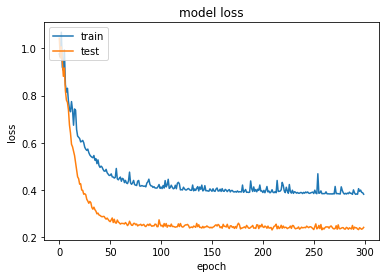

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import plot_model
import pydot
import graphviz
pydot.find_graphviz = lambda: True

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h4>Pregunta D</h4>
<p>Repita el paso anterior, utilizado ’Relu’ como funci´on de activaci´on y compare con lo obtenido en d).</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


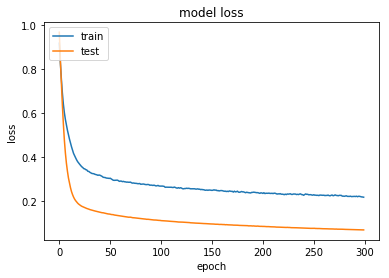

In [4]:

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Sigmoidal vs Relu </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


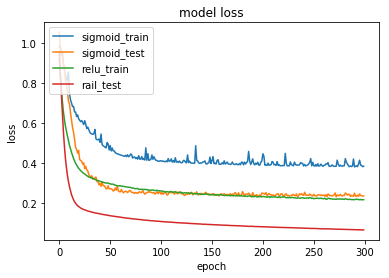

In [5]:

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sigmoid_train', 'sigmoid_test', 'relu_train', 'rail_test'], loc='upper left')
plt.show()

<h4>Pregunta E</h4>
<p>Repita c) y d) variando la tasa de aprendizaje (learning rate) en un rango sensible. Comente. Si
observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del
experimento.</p>

<h6>Para la función de activación relu </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])
Lear_rate
0.0


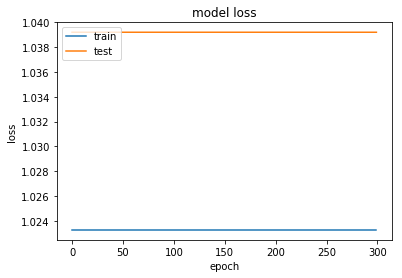

dict_keys(['loss', 'val_loss'])
Lear_rate
0.0526315789474


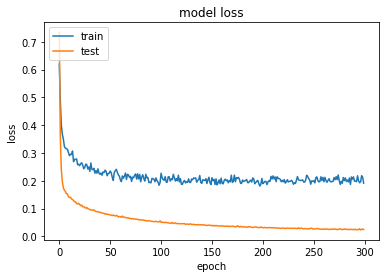

dict_keys(['loss', 'val_loss'])
Lear_rate
0.105263157895


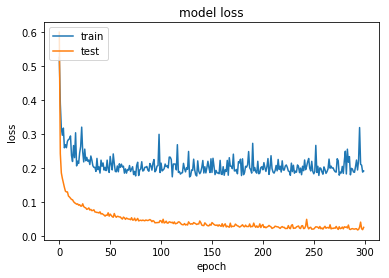

dict_keys(['loss', 'val_loss'])
Lear_rate
0.157894736842


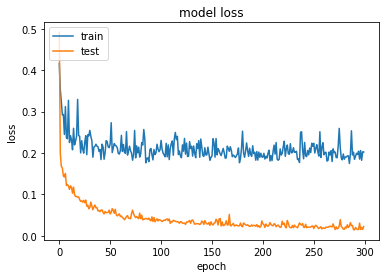

dict_keys(['loss', 'val_loss'])
Lear_rate
0.210526315789


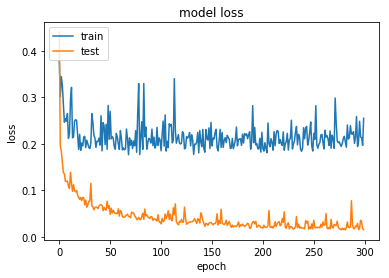

dict_keys(['loss', 'val_loss'])
Lear_rate
0.263157894737


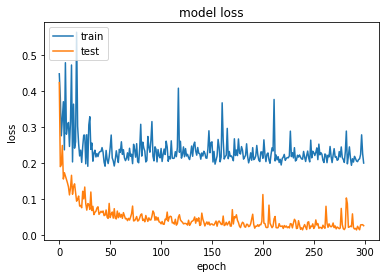

dict_keys(['loss', 'val_loss'])
Lear_rate
0.315789473684


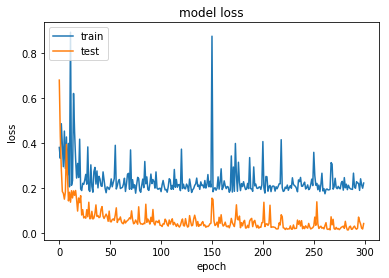

dict_keys(['loss', 'val_loss'])
Lear_rate
0.368421052632


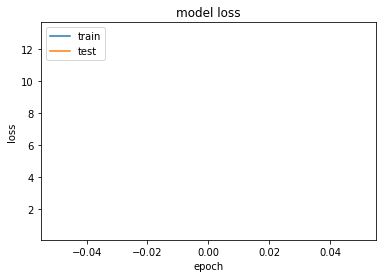

dict_keys(['loss', 'val_loss'])
Lear_rate
0.421052631579


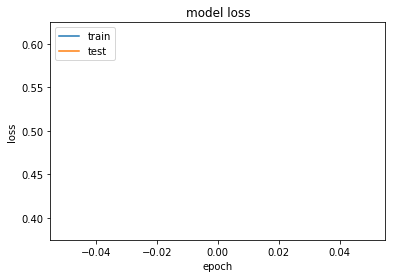

dict_keys(['loss', 'val_loss'])
Lear_rate
0.473684210526


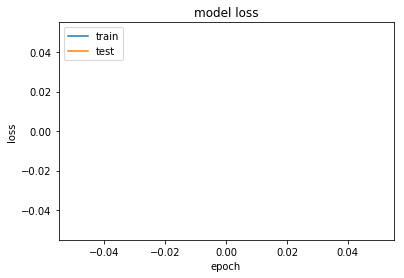

dict_keys(['loss', 'val_loss'])
Lear_rate
0.526315789474


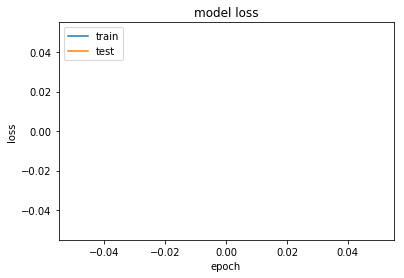

dict_keys(['loss', 'val_loss'])
Lear_rate
0.578947368421


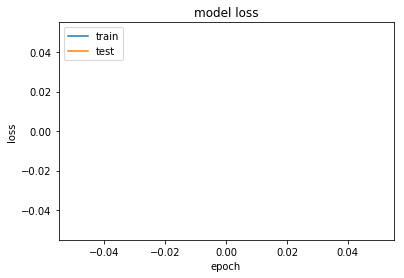

dict_keys(['loss', 'val_loss'])
Lear_rate
0.631578947368


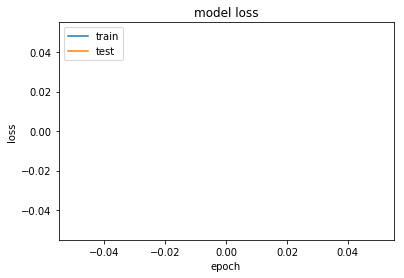

dict_keys(['loss', 'val_loss'])
Lear_rate
0.684210526316


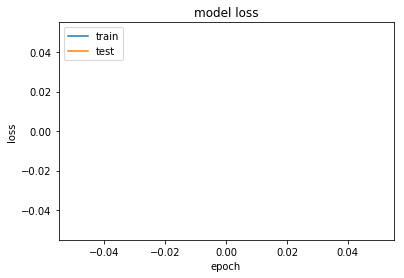

dict_keys(['loss', 'val_loss'])
Lear_rate
0.736842105263


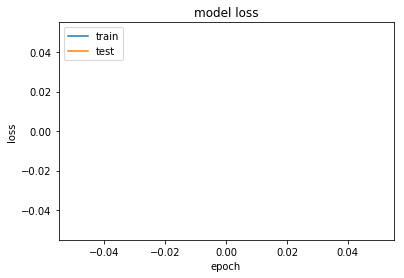

dict_keys(['loss', 'val_loss'])
Lear_rate
0.789473684211


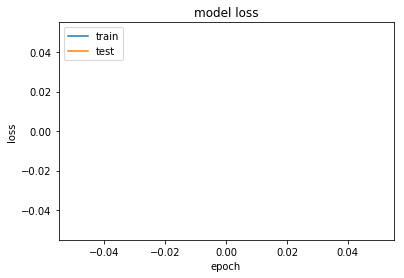

dict_keys(['loss', 'val_loss'])
Lear_rate
0.842105263158


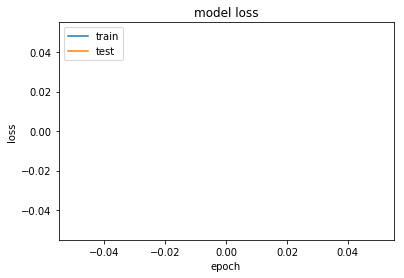

dict_keys(['loss', 'val_loss'])
Lear_rate
0.894736842105


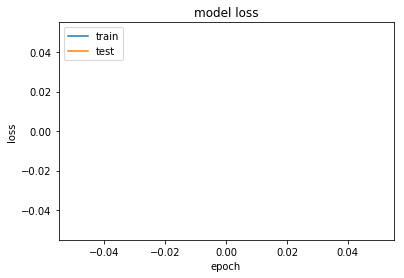

dict_keys(['loss', 'val_loss'])
Lear_rate
0.947368421053


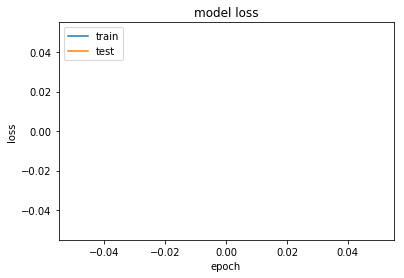

dict_keys(['loss', 'val_loss'])
Lear_rate
1.0


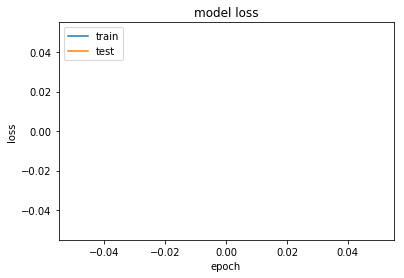

In [6]:
import numpy as np
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    print("Lear_rate")
    print(i)
    plt.show()


<h6>Para la función de activación sigmoidal </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


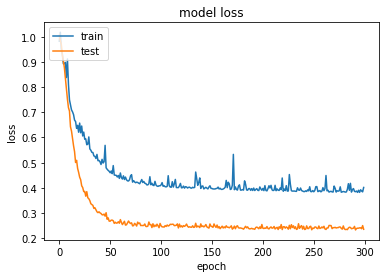

dict_keys(['loss', 'val_loss'])


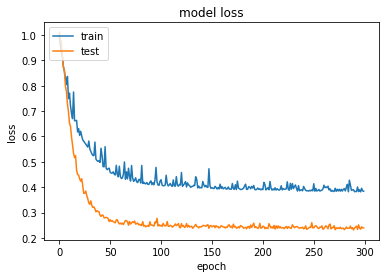

dict_keys(['loss', 'val_loss'])


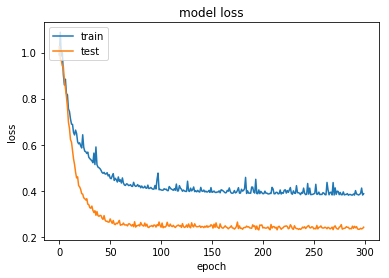

dict_keys(['loss', 'val_loss'])


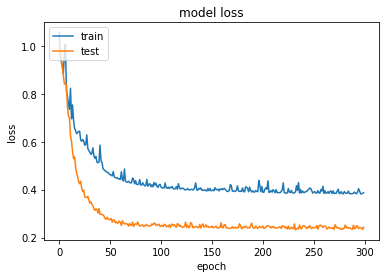

dict_keys(['loss', 'val_loss'])


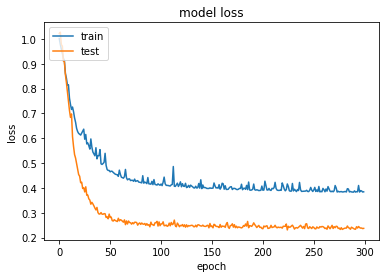

dict_keys(['loss', 'val_loss'])


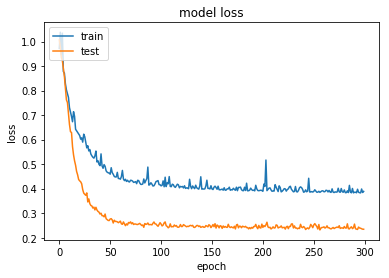

dict_keys(['loss', 'val_loss'])


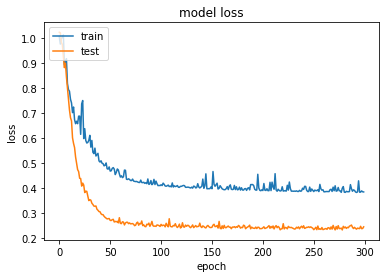

dict_keys(['loss', 'val_loss'])


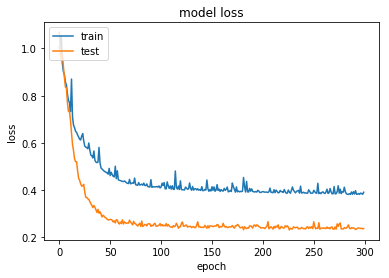

dict_keys(['loss', 'val_loss'])


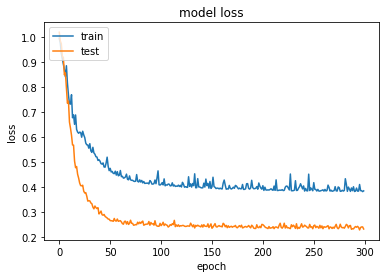

dict_keys(['loss', 'val_loss'])


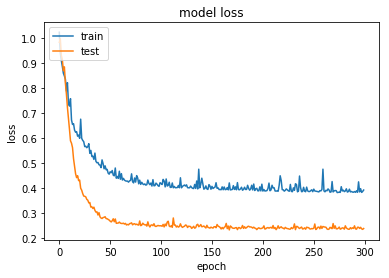

dict_keys(['loss', 'val_loss'])


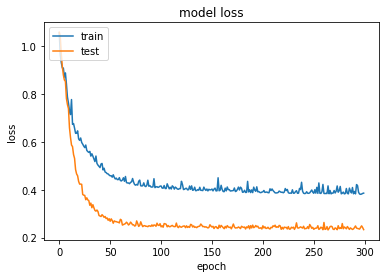

dict_keys(['loss', 'val_loss'])


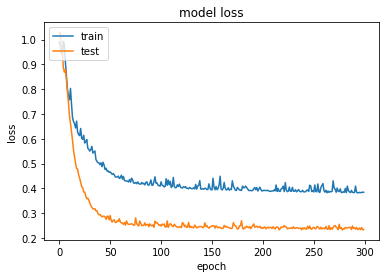

dict_keys(['loss', 'val_loss'])


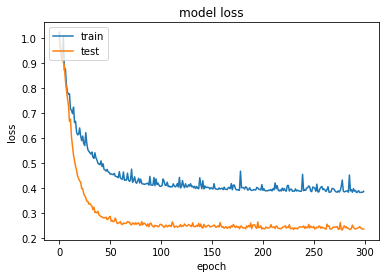

dict_keys(['loss', 'val_loss'])


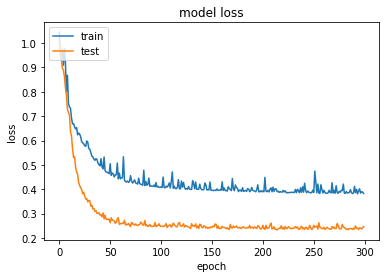

dict_keys(['loss', 'val_loss'])


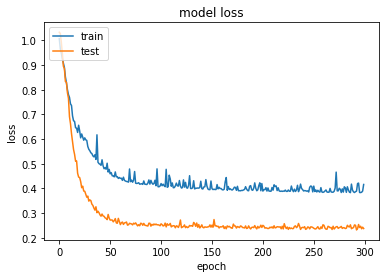

dict_keys(['loss', 'val_loss'])


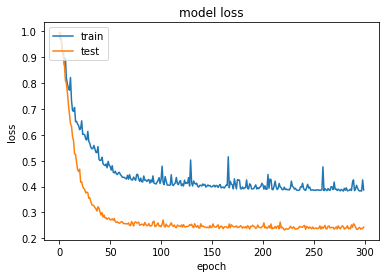

dict_keys(['loss', 'val_loss'])


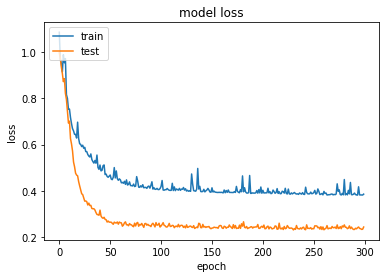

dict_keys(['loss', 'val_loss'])


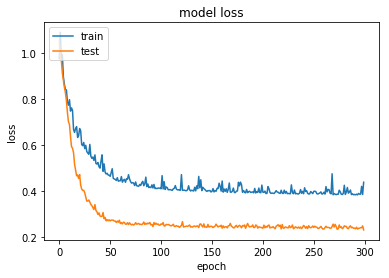

dict_keys(['loss', 'val_loss'])


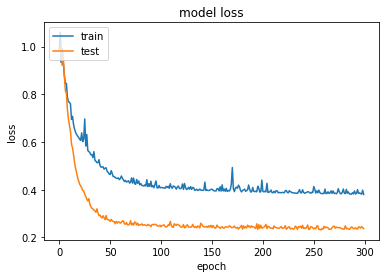

dict_keys(['loss', 'val_loss'])


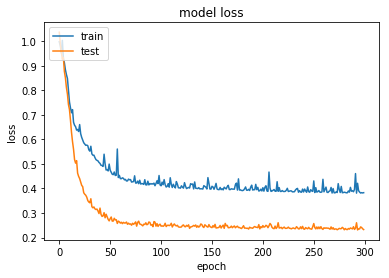

In [7]:
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<h4>Pregunta F</h4>
<p>Estime el error de predicción de los modelos c) y d) usando validación cruzada con un número de folds
igual a K = 5 y K = 10. Recuerde que para que la estimación sea razonable debe ajustar los pesos del
modelo de nuevo, cada vez que trabaja sobre un determinado fold. Mida el error real del modelo sobre
el conjunto de pruebas, compare y concluya.</p>

<h6>Para la función de activación sigmoidal</h6>

In [8]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print("____________________________________________\n")
print(mse_cv)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/300
341/341 [==============================] - 0s - loss: 398023811549259456.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                             
Epoch 3/300
341/341 [==============================] - 0s - loss: nan     
Epoch 4/300
341/341 [==============================] - 0s - loss: nan     
Epoch 5/300
341/341 [==============================] - 0s - loss: nan     
Epoch 6/300
341/341 [==============================] - 0s - loss: nan     
Epoch 7/300
341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [==============================] - 0s

341/341 [==============================] - 0s - loss: nan     
Epoch 108/300
341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
341/341 [==============================] - 0s - loss: nan     
Epoch 110/300
341/341 [==============================] - 0s - loss: nan     
Epoch 111/300
341/341 [==============================] - 0s - loss: nan     
Epoch 112/300
341/341 [==============================] - 0s - loss: nan     
Epoch 113/300
341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300
341/341 [==============================] - 0s - loss: nan     
Epoch 118/300
341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300

341/341 [==============================] - 0s - loss: nan     
Epoch 213/300
341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300
341/341 [==============================] - 0s - loss: nan     
Epoch 216/300
341/341 [==============================] - 0s - loss: nan     
Epoch 217/300
341/341 [==============================] - 0s - loss: nan     
Epoch 218/300
341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300

341/341 [==============================] - 0s - loss: nan     
Epoch 17/300
341/341 [==============================] - 0s - loss: nan     
Epoch 18/300
341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 21/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 22/300
341/341 [==============================] - 0s - loss: nan     
Epoch 23/300
341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [==============================] - 0s - loss: nan     
Epoch 28/300
341/341 [==============================] - 0s - 

341/341 [==============================] - 0s - loss: nan     
Epoch 123/300
341/341 [==============================] - 0s - loss: nan     
Epoch 124/300
341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300
341/341 [==============================] - 0s - loss: nan     
Epoch 127/300
341/341 [==============================] - 0s - loss: nan     
Epoch 128/300
341/341 [==============================] - 0s - loss: nan     
Epoch 129/300
341/341 [==============================] - 0s - loss: nan     
Epoch 130/300
341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300

341/341 [==============================] - 0s - loss: nan     
Epoch 228/300
341/341 [==============================] - 0s - loss: nan     
Epoch 229/300
341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300
341/341 [==============================] - 0s - loss: nan     
Epoch 232/300
341/341 [==============================] - 0s - loss: nan     
Epoch 233/300
341/341 [==============================] - 0s - loss: nan     
Epoch 234/300
341/341 [==============================] - 0s - loss: nan     
Epoch 235/300
341/341 [==============================] - 0s - loss: nan     
Epoch 236/300
341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300

341/341 [==============================] - 0s - loss: nan     
Epoch 33/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 34/300
341/341 [==============================] - 0s - loss: nan     
Epoch 35/300
341/341 [==============================] - 0s - loss: nan     
Epoch 36/300
341/341 [==============================] - 0s - loss: nan     
Epoch 37/300
341/341 [==============================] - 0s - loss: nan     
Epoch 38/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 39/300
341/341 [==============================] - 0s - loss: nan     
Epoch 40/300
341/341 [==============================] - 0s - loss: nan     
Epoch 41/300
341/341 [==============================] - 0s - loss: nan     
Epoch 42/300
341/341 [==============================] - 0s - loss: nan     
Epoch 43/300
341/341 [==============================] - 0s - loss: nan     
Epoch 44/300
341/341 [==============================] - 0s - 

341/341 [==============================] - 0s - loss: nan     
Epoch 139/300
341/341 [==============================] - 0s - loss: nan     
Epoch 140/300
341/341 [==============================] - 0s - loss: nan     
Epoch 141/300
341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300
341/341 [==============================] - 0s - loss: nan     
Epoch 144/300
341/341 [==============================] - 0s - loss: nan     
Epoch 145/300
341/341 [==============================] - 0s - loss: nan     
Epoch 146/300
341/341 [==============================] - 0s - loss: nan     
Epoch 147/300
341/341 [==============================] - 0s - loss: nan     
Epoch 148/300
341/341 [==============================] - 0s - loss: nan     
Epoch 149/300
341/341 [==============================] - 0s - loss: nan     
Epoch 150/300
341/341 [==============================] - 0s - loss: nan     
Epoch 151/300

341/341 [==============================] - 0s - loss: nan     
Epoch 244/300
341/341 [==============================] - 0s - loss: nan     
Epoch 245/300
341/341 [==============================] - 0s - loss: nan     
Epoch 246/300
341/341 [==============================] - 0s - loss: nan     
Epoch 247/300
341/341 [==============================] - 0s - loss: nan     
Epoch 248/300
341/341 [==============================] - 0s - loss: nan     
Epoch 249/300
341/341 [==============================] - 0s - loss: nan     
Epoch 250/300
341/341 [==============================] - 0s - loss: nan     
Epoch 251/300
341/341 [==============================] - 0s - loss: nan     
Epoch 252/300
341/341 [==============================] - 0s - loss: nan     
Epoch 253/300
341/341 [==============================] - 0s - loss: nan     
Epoch 254/300
341/341 [==============================] - 0s - loss: nan     
Epoch 255/300
341/341 [==============================] - 0s - loss: nan     
Epoch 256/300

341/341 [==============================] - 0s - loss: nan     
Epoch 48/300
341/341 [==============================] - 0s - loss: nan     
Epoch 49/300
341/341 [==============================] - 0s - loss: nan     
Epoch 50/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 51/300
341/341 [==============================] - 0s - loss: nan     
Epoch 52/300
341/341 [==============================] - 0s - loss: nan     
Epoch 53/300
341/341 [==============================] - 0s - loss: nan     
Epoch 54/300
341/341 [==============================] - 0s - loss: nan     
Epoch 55/300
341/341 [==============================] - 0s - loss: nan     
Epoch 56/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 57/300
341/341 [==============================] - 0s - loss: nan     
Epoch 58/300
341/341 [==============================] - 0s - loss: nan     
Epoch 59/300
341/341 [==============================] - 0s - 

341/341 [==============================] - 0s - loss: nan     
Epoch 153/300
341/341 [==============================] - 0s - loss: nan     
Epoch 154/300
341/341 [==============================] - 0s - loss: nan     
Epoch 155/300
341/341 [==============================] - 0s - loss: nan     
Epoch 156/300
341/341 [==============================] - 0s - loss: nan     
Epoch 157/300
341/341 [==============================] - 0s - loss: nan     
Epoch 158/300
341/341 [==============================] - 0s - loss: nan     
Epoch 159/300
341/341 [==============================] - 0s - loss: nan     
Epoch 160/300
341/341 [==============================] - 0s - loss: nan     
Epoch 161/300
341/341 [==============================] - 0s - loss: nan     
Epoch 162/300
341/341 [==============================] - 0s - loss: nan     
Epoch 163/300
341/341 [==============================] - 0s - loss: nan     
Epoch 164/300
341/341 [==============================] - 0s - loss: nan     
Epoch 165/300

341/341 [==============================] - 0s - loss: nan     
Epoch 259/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 260/300
341/341 [==============================] - 0s - loss: nan     
Epoch 261/300
341/341 [==============================] - 0s - loss: nan     
Epoch 262/300
341/341 [==============================] - 0s - loss: nan     
Epoch 263/300
341/341 [==============================] - 0s - loss: nan     
Epoch 264/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 265/300
341/341 [==============================] - 0s - loss: nan     
Epoch 266/300
341/341 [==============================] - 0s - loss: nan     
Epoch 267/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 268/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 269/300
341/341 [==============================] - 0s - loss: nan     
Epoch 270/

341/341 [==============================] - 0s - loss: nan     
Epoch 64/300
341/341 [==============================] - 0s - loss: nan     
Epoch 65/300
341/341 [==============================] - 0s - loss: nan     
Epoch 66/300
341/341 [==============================] - 0s - loss: nan     
Epoch 67/300
341/341 [==============================] - 0s - loss: nan     
Epoch 68/300
341/341 [==============================] - 0s - loss: nan     
Epoch 69/300
341/341 [==============================] - 0s - loss: nan     
Epoch 70/300
341/341 [==============================] - 0s - loss: nan     
Epoch 71/300
341/341 [==============================] - 0s - loss: nan     
Epoch 72/300
341/341 [==============================] - 0s - loss: nan     
Epoch 73/300
341/341 [==============================] - 0s - loss: nan     
Epoch 74/300
341/341 [==============================] - 0s - loss: nan     
Epoch 75/300
341/341 [==============================] - 0s - loss: nan     
Epoch 76/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 170/300
341/341 [==============================] - 0s - loss: nan     
Epoch 171/300
341/341 [==============================] - 0s - loss: nan     
Epoch 172/300
341/341 [==============================] - 0s - loss: nan     
Epoch 173/300
341/341 [==============================] - 0s - loss: nan     
Epoch 174/300
341/341 [==============================] - 0s - loss: nan     
Epoch 175/300
341/341 [==============================] - 0s - loss: nan     
Epoch 176/300
341/341 [==============================] - 0s - loss: nan     
Epoch 177/300
341/341 [==============================] - 0s - loss: nan     
Epoch 178/300
341/341 [==============================] - 0s - loss: nan     
Epoch 179/300
341/341 [==============================] - 0s - loss: nan     
Epoch 180/300
341/341 [==============================] - 0s - loss: nan     
Epoch 181/300
341/341 [==============================] - 0s - loss: nan     
Epoch 182/300

341/341 [==============================] - 0s - loss: nan     
Epoch 275/300
341/341 [==============================] - 0s - loss: nan     
Epoch 276/300
341/341 [==============================] - 0s - loss: nan     
Epoch 277/300
341/341 [==============================] - 0s - loss: nan     
Epoch 278/300
341/341 [==============================] - 0s - loss: nan     
Epoch 279/300
341/341 [==============================] - 0s - loss: nan     
Epoch 280/300
341/341 [==============================] - 0s - loss: nan     
Epoch 281/300
341/341 [==============================] - 0s - loss: nan     
Epoch 282/300
341/341 [==============================] - 0s - loss: nan     
Epoch 283/300
341/341 [==============================] - 0s - loss: nan     
Epoch 284/300
341/341 [==============================] - 0s - loss: nan     
Epoch 285/300
341/341 [==============================] - 0s - loss: nan     
Epoch 286/300
341/341 [==============================] - 0s - loss: nan     
Epoch 287/300

341/341 [==============================] - 0s - loss: nan     
Epoch 80/300
341/341 [==============================] - 0s - loss: nan     
Epoch 81/300
341/341 [==============================] - 0s - loss: nan     
Epoch 82/300
341/341 [==============================] - 0s - loss: nan     
Epoch 83/300
341/341 [==============================] - 0s - loss: nan     
Epoch 84/300
341/341 [==============================] - 0s - loss: nan     
Epoch 85/300
341/341 [==============================] - 0s - loss: nan     
Epoch 86/300
341/341 [==============================] - 0s - loss: nan     
Epoch 87/300
341/341 [==============================] - 0s - loss: nan     
Epoch 88/300
341/341 [==============================] - 0s - loss: nan     
Epoch 89/300
341/341 [==============================] - 0s - loss: nan     
Epoch 90/300
341/341 [==============================] - 0s - loss: nan     
Epoch 91/300
341/341 [==============================] - 0s - loss: nan     
Epoch 92/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 185/300
341/341 [==============================] - 0s - loss: nan     
Epoch 186/300
341/341 [==============================] - 0s - loss: nan     
Epoch 187/300
341/341 [==============================] - 0s - loss: nan     
Epoch 188/300
341/341 [==============================] - 0s - loss: nan     
Epoch 189/300
341/341 [==============================] - 0s - loss: nan     
Epoch 190/300
341/341 [==============================] - 0s - loss: nan     
Epoch 191/300
341/341 [==============================] - 0s - loss: nan     
Epoch 192/300
341/341 [==============================] - 0s - loss: nan     
Epoch 193/300
341/341 [==============================] - 0s - loss: nan     
Epoch 194/300
341/341 [==============================] - 0s - loss: nan     
Epoch 195/300
341/341 [==============================] - 0s - loss: nan     
Epoch 196/300
341/341 [==============================] - 0s - loss: nan     
Epoch 197/300

341/341 [==============================] - 0s - loss: nan     
Epoch 291/300
341/341 [==============================] - 0s - loss: nan     
Epoch 292/300
341/341 [==============================] - 0s - loss: nan     
Epoch 293/300
341/341 [==============================] - 0s - loss: nan     
Epoch 294/300
341/341 [==============================] - 0s - loss: nan     
Epoch 295/300
341/341 [==============================] - 0s - loss: nan     
Epoch 296/300
341/341 [==============================] - 0s - loss: nan     
Epoch 297/300
341/341 [==============================] - 0s - loss: nan     
Epoch 298/300
341/341 [==============================] - 0s - loss: nan     
Epoch 299/300
341/341 [==============================] - 0s - loss: nan     
Epoch 300/300
341/341 [==============================] - 0s - loss: 478754836952686702624768.0000
Epoch 2/300
341/341 [==============================] - 0s - loss: nan                                   
Epoch 3/300
341/341 [====================

341/341 [==============================] - 0s - loss: nan     
Epoch 97/300
341/341 [==============================] - 0s - loss: nan     
Epoch 98/300
341/341 [==============================] - 0s - loss: nan     
Epoch 99/300
341/341 [==============================] - 0s - loss: nan     
Epoch 100/300
341/341 [==============================] - 0s - loss: nan     
Epoch 101/300
341/341 [==============================] - 0s - loss: nan     
Epoch 102/300
341/341 [==============================] - 0s - loss: nan     
Epoch 103/300
341/341 [==============================] - 0s - loss: nan     
Epoch 104/300
341/341 [==============================] - 0s - loss: nan     
Epoch 105/300
341/341 [==============================] - 0s - loss: nan     
Epoch 106/300
341/341 [==============================] - 0s - loss: nan     
Epoch 107/300
341/341 [==============================] - 0s - loss: nan     
Epoch 108/300
341/341 [==============================] - 0s - loss: nan     
Epoch 109/300
34

341/341 [==============================] - 0s - loss: nan     
Epoch 203/300
341/341 [==============================] - 0s - loss: nan     
Epoch 204/300
341/341 [==============================] - 0s - loss: nan     
Epoch 205/300
341/341 [==============================] - 0s - loss: nan     
Epoch 206/300
341/341 [==============================] - 0s - loss: nan     
Epoch 207/300
341/341 [==============================] - 0s - loss: nan     
Epoch 208/300
341/341 [==============================] - 0s - loss: nan     
Epoch 209/300
341/341 [==============================] - 0s - loss: nan     
Epoch 210/300
341/341 [==============================] - 0s - loss: nan     
Epoch 211/300
341/341 [==============================] - 0s - loss: nan     
Epoch 212/300
341/341 [==============================] - 0s - loss: nan     
Epoch 213/300
341/341 [==============================] - 0s - loss: nan     
Epoch 214/300
341/341 [==============================] - 0s - loss: nan     
Epoch 215/300

341/341 [==============================] - 0s - loss: nan     
Epoch 8/300
341/341 [==============================] - 0s - loss: nan     
Epoch 9/300
341/341 [==============================] - 0s - loss: nan     
Epoch 10/300
341/341 [==============================] - 0s - loss: nan     
Epoch 11/300
341/341 [==============================] - 0s - loss: nan     
Epoch 12/300
341/341 [==============================] - 0s - loss: nan     
Epoch 13/300
341/341 [==============================] - 0s - loss: nan     
Epoch 14/300
341/341 [==============================] - 0s - loss: nan     
Epoch 15/300
341/341 [==============================] - 0s - loss: nan     
Epoch 16/300
341/341 [==============================] - 0s - loss: nan     
Epoch 17/300
341/341 [==============================] - 0s - loss: nan     
Epoch 18/300
341/341 [==============================] - 0s - loss: nan     
Epoch 19/300
341/341 [==============================] - 0s - loss: nan     
Epoch 20/300
341/341 [=====

341/341 [==============================] - 0s - loss: nan     
Epoch 114/300
341/341 [==============================] - 0s - loss: nan     
Epoch 115/300
341/341 [==============================] - 0s - loss: nan     
Epoch 116/300
341/341 [==============================] - 0s - loss: nan     
Epoch 117/300
341/341 [==============================] - 0s - loss: nan     
Epoch 118/300
341/341 [==============================] - 0s - loss: nan     
Epoch 119/300
341/341 [==============================] - 0s - loss: nan     
Epoch 120/300
341/341 [==============================] - 0s - loss: nan     
Epoch 121/300
341/341 [==============================] - 0s - loss: nan     
Epoch 122/300
341/341 [==============================] - 0s - loss: nan     
Epoch 123/300
341/341 [==============================] - 0s - loss: nan     
Epoch 124/300
341/341 [==============================] - 0s - loss: nan     
Epoch 125/300
341/341 [==============================] - 0s - loss: nan     
Epoch 126/300

341/341 [==============================] - 0s - loss: nan     
Epoch 219/300
341/341 [==============================] - 0s - loss: nan     
Epoch 220/300
341/341 [==============================] - 0s - loss: nan     
Epoch 221/300
341/341 [==============================] - 0s - loss: nan     
Epoch 222/300
341/341 [==============================] - 0s - loss: nan     
Epoch 223/300
341/341 [==============================] - 0s - loss: nan     
Epoch 224/300
341/341 [==============================] - 0s - loss: nan     
Epoch 225/300
341/341 [==============================] - 0s - loss: nan     
Epoch 226/300
341/341 [==============================] - 0s - loss: nan     
Epoch 227/300
341/341 [==============================] - 0s - loss: nan     
Epoch 228/300
341/341 [==============================] - 0s - loss: nan     
Epoch 229/300
341/341 [==============================] - 0s - loss: nan     
Epoch 230/300
341/341 [==============================] - 0s - loss: nan     
Epoch 231/300

341/341 [==============================] - 0s - loss: nan     
Epoch 24/300
341/341 [==============================] - 0s - loss: nan     
Epoch 25/300
341/341 [==============================] - 0s - loss: nan     
Epoch 26/300
341/341 [==============================] - 0s - loss: nan     
Epoch 27/300
341/341 [==============================] - 0s - loss: nan     
Epoch 28/300
341/341 [==============================] - 0s - loss: nan     
Epoch 29/300
341/341 [==============================] - 0s - loss: nan     
Epoch 30/300
341/341 [==============================] - 0s - loss: nan     
Epoch 31/300
341/341 [==============================] - 0s - loss: nan     
Epoch 32/300
341/341 [==============================] - 0s - loss: nan     
Epoch 33/300
341/341 [==============================] - 0s - loss: nan     
Epoch 34/300
341/341 [==============================] - 0s - loss: nan     
Epoch 35/300
341/341 [==============================] - 0s - loss: nan     
Epoch 36/300
341/341 [===

341/341 [==============================] - 0s - loss: nan     
Epoch 131/300
341/341 [==============================] - 0s - loss: nan     
Epoch 132/300
341/341 [==============================] - 0s - loss: nan     
Epoch 133/300
341/341 [==============================] - 0s - loss: nan     
Epoch 134/300
341/341 [==============================] - 0s - loss: nan     
Epoch 135/300
341/341 [==============================] - 0s - loss: nan     
Epoch 136/300
341/341 [==============================] - 0s - loss: nan     
Epoch 137/300
341/341 [==============================] - 0s - loss: nan     
Epoch 138/300
341/341 [==============================] - 0s - loss: nan     
Epoch 139/300
341/341 [==============================] - 0s - loss: nan     
Epoch 140/300
341/341 [==============================] - 0s - loss: nan     
Epoch 141/300
341/341 [==============================] - 0s - loss: nan     
Epoch 142/300
341/341 [==============================] - 0s - loss: nan     
Epoch 143/300

341/341 [==============================] - 0s - loss: nan     
Epoch 237/300
341/341 [==============================] - 0s - loss: nan     
Epoch 238/300
341/341 [==============================] - 0s - loss: nan     
Epoch 239/300
341/341 [==============================] - 0s - loss: nan     
Epoch 240/300
341/341 [==============================] - ETA: 0s - loss: n - 0s - loss: nan     
Epoch 241/300
341/341 [==============================] - 0s - loss: nan     
Epoch 242/300
341/341 [==============================] - 0s - loss: nan     
Epoch 243/300
341/341 [==============================] - 0s - loss: nan     
Epoch 244/300
341/341 [==============================] - 0s - loss: nan     
Epoch 245/300
341/341 [==============================] - 0s - loss: nan     
Epoch 246/300
341/341 [==============================] - 0s - loss: nan     
Epoch 247/300
341/341 [==============================] - 0s - loss: nan     
Epoch 248/300
341/341 [==============================] - 0s - loss: na

342/342 [==============================] - 0s - loss: nan     
Epoch 42/300
342/342 [==============================] - 0s - loss: nan     
Epoch 43/300
342/342 [==============================] - 0s - loss: nan     
Epoch 44/300
342/342 [==============================] - 0s - loss: nan     
Epoch 45/300
342/342 [==============================] - 0s - loss: nan     
Epoch 46/300
342/342 [==============================] - 0s - loss: nan     
Epoch 47/300
342/342 [==============================] - 0s - loss: nan     
Epoch 48/300
342/342 [==============================] - 0s - loss: nan     
Epoch 49/300
342/342 [==============================] - 0s - loss: nan     
Epoch 50/300
342/342 [==============================] - 0s - loss: nan     
Epoch 51/300
342/342 [==============================] - 0s - loss: nan     
Epoch 52/300
342/342 [==============================] - 0s - loss: nan     
Epoch 53/300
342/342 [==============================] - 0s - loss: nan     
Epoch 54/300
342/342 [===

342/342 [==============================] - 0s - loss: nan     
Epoch 148/300
342/342 [==============================] - 0s - loss: nan     
Epoch 149/300
342/342 [==============================] - 0s - loss: nan     
Epoch 150/300
342/342 [==============================] - 0s - loss: nan     
Epoch 151/300
342/342 [==============================] - 0s - loss: nan     
Epoch 152/300
342/342 [==============================] - 0s - loss: nan     
Epoch 153/300
342/342 [==============================] - 0s - loss: nan     
Epoch 154/300
342/342 [==============================] - 0s - loss: nan     
Epoch 155/300
342/342 [==============================] - 0s - loss: nan     
Epoch 156/300
342/342 [==============================] - 0s - loss: nan     
Epoch 157/300
342/342 [==============================] - 0s - loss: nan     
Epoch 158/300
342/342 [==============================] - 0s - loss: nan     
Epoch 159/300
342/342 [==============================] - 0s - loss: nan     
Epoch 160/300

342/342 [==============================] - 0s - loss: nan     
Epoch 253/300
342/342 [==============================] - 0s - loss: nan     
Epoch 254/300
342/342 [==============================] - 0s - loss: nan     
Epoch 255/300
342/342 [==============================] - 0s - loss: nan     
Epoch 256/300
342/342 [==============================] - 0s - loss: nan     
Epoch 257/300
342/342 [==============================] - 0s - loss: nan     
Epoch 258/300
342/342 [==============================] - 0s - loss: nan     
Epoch 259/300
342/342 [==============================] - 0s - loss: nan     
Epoch 260/300
342/342 [==============================] - 0s - loss: nan     
Epoch 261/300
342/342 [==============================] - 0s - loss: nan     
Epoch 262/300
342/342 [==============================] - 0s - loss: nan     
Epoch 263/300
342/342 [==============================] - 0s - loss: nan     
Epoch 264/300
342/342 [==============================] - 0s - loss: nan     
Epoch 265/300

<h6>Para la función de activación Relu</h6>

In [9]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []
for i, (train, val) in enumerate(kfold):
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
print("____________________________________________\n")
print(mse_cv)

Epoch 1/300


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


303/303 [==============================] - 0s - loss: 0.5166     
Epoch 2/300
303/303 [==============================] - 0s - loss: 0.2216     
Epoch 3/300
303/303 [==============================] - 0s - loss: 0.2395     
Epoch 4/300
303/303 [==============================] - 0s - loss: 0.1698     
Epoch 5/300
303/303 [==============================] - 0s - loss: 0.2011     
Epoch 6/300
303/303 [==============================] - 0s - loss: 0.1385     
Epoch 7/300
303/303 [==============================] - 0s - loss: 0.1883     
Epoch 8/300
303/303 [==============================] - 0s - loss: 0.1354     
Epoch 9/300
303/303 [==============================] - 0s - loss: 0.1195     
Epoch 10/300
303/303 [==============================] - 0s - loss: 0.1162     
Epoch 11/300
303/303 [==============================] - 0s - loss: 0.1071     
Epoch 12/300
303/303 [==============================] - 0s - loss: 0.1078     
Epoch 13/300
303/303 [==============================] - 0s - loss: 0.1110

303/303 [==============================] - 0s - loss: 0.0371     
Epoch 104/300
303/303 [==============================] - ETA: 0s - loss: 0.022 - 0s - loss: 0.0272     
Epoch 105/300
303/303 [==============================] - 0s - loss: 0.0260     
Epoch 106/300
303/303 [==============================] - 0s - loss: 0.0304     
Epoch 107/300
303/303 [==============================] - 0s - loss: 0.0257     
Epoch 108/300
303/303 [==============================] - ETA: 0s - loss: 0.027 - 0s - loss: 0.0289     
Epoch 109/300
303/303 [==============================] - 0s - loss: 0.0234     
Epoch 110/300
303/303 [==============================] - 0s - loss: 0.0267     
Epoch 111/300
303/303 [==============================] - 0s - loss: 0.0259     
Epoch 112/300
303/303 [==============================] - 0s - loss: 0.0268     
Epoch 113/300
303/303 [==============================] - 0s - loss: 0.0378     
Epoch 114/300
303/303 [==============================] - 0s - loss: 0.0350     
Epoch 

303/303 [==============================] - 0s - loss: 0.0206     
Epoch 203/300
303/303 [==============================] - 0s - loss: 0.0175     
Epoch 204/300
303/303 [==============================] - 0s - loss: 0.0212     
Epoch 205/300
303/303 [==============================] - 0s - loss: 0.0189     
Epoch 206/300
303/303 [==============================] - 0s - loss: 0.0306     
Epoch 207/300
303/303 [==============================] - 0s - loss: 0.0175     
Epoch 208/300
303/303 [==============================] - 0s - loss: 0.0232     
Epoch 209/300
303/303 [==============================] - 0s - loss: 0.0429     
Epoch 210/300
303/303 [==============================] - 0s - loss: 0.0193     
Epoch 211/300
303/303 [==============================] - 0s - loss: 0.0195     
Epoch 212/300
303/303 [==============================] - 0s - loss: 0.0168     
Epoch 213/300
303/303 [==============================] - 0s - loss: 0.0177     
Epoch 214/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.1545     
Epoch 5/300
303/303 [==============================] - 0s - loss: 0.1366     
Epoch 6/300
303/303 [==============================] - 0s - loss: 0.1465     
Epoch 7/300
303/303 [==============================] - 0s - loss: 0.1402     
Epoch 8/300
303/303 [==============================] - 0s - loss: 0.1268     
Epoch 9/300
303/303 [==============================] - 0s - loss: 0.1281     
Epoch 10/300
303/303 [==============================] - 0s - loss: 0.0963     
Epoch 11/300
303/303 [==============================] - 0s - loss: 0.1105     
Epoch 12/300
303/303 [==============================] - 0s - loss: 0.0852     
Epoch 13/300
303/303 [==============================] - 0s - loss: 0.0934     
Epoch 14/300
303/303 [==============================] - 0s - loss: 0.0820     
Epoch 15/300
303/303 [==============================] - 0s - loss: 0.0917     
Epoch 16/300
303/303 [==============================] - 0s - loss: 0.1

303/303 [==============================] - 0s - loss: 0.0366     
Epoch 107/300
303/303 [==============================] - 0s - loss: 0.0321     
Epoch 108/300
303/303 [==============================] - 0s - loss: 0.0396     
Epoch 109/300
303/303 [==============================] - 0s - loss: 0.0408     
Epoch 110/300
303/303 [==============================] - ETA: 0s - loss: 0.033 - 0s - loss: 0.0339     
Epoch 111/300
303/303 [==============================] - 0s - loss: 0.0267     
Epoch 112/300
303/303 [==============================] - 0s - loss: 0.0298     
Epoch 113/300
303/303 [==============================] - 0s - loss: 0.0429     
Epoch 114/300
303/303 [==============================] - 0s - loss: 0.0390     
Epoch 115/300
303/303 [==============================] - 0s - loss: 0.0298     
Epoch 116/300
303/303 [==============================] - 0s - loss: 0.0326     
Epoch 117/300
303/303 [==============================] - 0s - loss: 0.0260     
Epoch 118/300
303/303 [=======

303/303 [==============================] - 0s - loss: 0.0285     
Epoch 207/300
303/303 [==============================] - 0s - loss: 0.0221     
Epoch 208/300
303/303 [==============================] - 0s - loss: 0.0239     
Epoch 209/300
303/303 [==============================] - 0s - loss: 0.0305     
Epoch 210/300
303/303 [==============================] - 0s - loss: 0.0207     
Epoch 211/300
303/303 [==============================] - 0s - loss: 0.0344     
Epoch 212/300
303/303 [==============================] - 0s - loss: 0.0256     
Epoch 213/300
303/303 [==============================] - 0s - loss: 0.0205     
Epoch 214/300
303/303 [==============================] - 0s - loss: 0.0237     
Epoch 215/300
303/303 [==============================] - 0s - loss: 0.0268     
Epoch 216/300
303/303 [==============================] - 0s - loss: 0.0199     
Epoch 217/300
303/303 [==============================] - 0s - loss: 0.0214     
Epoch 218/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.1490     
Epoch 8/300
303/303 [==============================] - 0s - loss: 0.1622     
Epoch 9/300
303/303 [==============================] - 0s - loss: 0.1501     
Epoch 10/300
303/303 [==============================] - 0s - loss: 0.1394     
Epoch 11/300
303/303 [==============================] - 0s - loss: 0.1227     
Epoch 12/300
303/303 [==============================] - 0s - loss: 0.1432     
Epoch 13/300
303/303 [==============================] - 0s - loss: 0.1197     
Epoch 14/300
303/303 [==============================] - 0s - loss: 0.1230     
Epoch 15/300
303/303 [==============================] - 0s - loss: 0.1393     
Epoch 16/300
303/303 [==============================] - 0s - loss: 0.1268     
Epoch 17/300
303/303 [==============================] - 0s - loss: 0.1028     
Epoch 18/300
303/303 [==============================] - ETA: 0s - loss: 0.066 - 0s - loss: 0.1261     
Epoch 19/300
303/303 [=====================

303/303 [==============================] - 0s - loss: 0.0313     
Epoch 110/300
303/303 [==============================] - 0s - loss: 0.0399     
Epoch 111/300
303/303 [==============================] - 0s - loss: 0.0369     
Epoch 112/300
303/303 [==============================] - 0s - loss: 0.0437     
Epoch 113/300
303/303 [==============================] - 0s - loss: 0.0848     
Epoch 114/300
303/303 [==============================] - 0s - loss: 0.0358     
Epoch 115/300
303/303 [==============================] - 0s - loss: 0.0325     
Epoch 116/300
303/303 [==============================] - 0s - loss: 0.0334     
Epoch 117/300
303/303 [==============================] - 0s - loss: 0.0360     
Epoch 118/300
303/303 [==============================] - 0s - loss: 0.0267     
Epoch 119/300
303/303 [==============================] - 0s - loss: 0.0331     
Epoch 120/300
303/303 [==============================] - 0s - loss: 0.0343     
Epoch 121/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.0200     
Epoch 212/300
303/303 [==============================] - 0s - loss: 0.0190     
Epoch 213/300
303/303 [==============================] - 0s - loss: 0.0269     
Epoch 214/300
303/303 [==============================] - 0s - loss: 0.0269     
Epoch 215/300
303/303 [==============================] - 0s - loss: 0.0456     
Epoch 216/300
303/303 [==============================] - 0s - loss: 0.0189     
Epoch 217/300
303/303 [==============================] - 0s - loss: 0.0219     
Epoch 218/300
303/303 [==============================] - 0s - loss: 0.0198     
Epoch 219/300
303/303 [==============================] - 0s - loss: 0.0207     
Epoch 220/300
303/303 [==============================] - 0s - loss: 0.0188     
Epoch 221/300
303/303 [==============================] - 0s - loss: 0.0230     
Epoch 222/300
303/303 [==============================] - 0s - loss: 0.0263     
Epoch 223/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.1104     
Epoch 13/300
303/303 [==============================] - 0s - loss: 0.1010     
Epoch 14/300
303/303 [==============================] - 0s - loss: 0.1050     
Epoch 15/300
303/303 [==============================] - 0s - loss: 0.0987     
Epoch 16/300
303/303 [==============================] - 0s - loss: 0.0968     
Epoch 17/300
303/303 [==============================] - 0s - loss: 0.0843     
Epoch 18/300
303/303 [==============================] - 0s - loss: 0.0881     
Epoch 19/300
303/303 [==============================] - ETA: 0s - loss: 0.052 - 0s - loss: 0.0972     
Epoch 20/300
303/303 [==============================] - 0s - loss: 0.0989     
Epoch 21/300
303/303 [==============================] - 0s - loss: 0.0940     
Epoch 22/300
303/303 [==============================] - 0s - loss: 0.0836     
Epoch 23/300
303/303 [==============================] - 0s - loss: 0.0916     
Epoch 24/300
303/303 [===================

303/303 [==============================] - 0s - loss: 0.0339     
Epoch 116/300
303/303 [==============================] - 0s - loss: 0.0350     
Epoch 117/300
303/303 [==============================] - 0s - loss: 0.0269     
Epoch 118/300
303/303 [==============================] - 0s - loss: 0.0369     
Epoch 119/300
303/303 [==============================] - 0s - loss: 0.0340     
Epoch 120/300
303/303 [==============================] - 0s - loss: 0.0277     
Epoch 121/300
303/303 [==============================] - 0s - loss: 0.0288     
Epoch 122/300
303/303 [==============================] - 0s - loss: 0.0400     
Epoch 123/300
303/303 [==============================] - 0s - loss: 0.0336     
Epoch 124/300
303/303 [==============================] - 0s - loss: 0.0267     
Epoch 125/300
303/303 [==============================] - 0s - loss: 0.0335     
Epoch 126/300
303/303 [==============================] - 0s - loss: 0.0476     
Epoch 127/300
303/303 [==============================]

303/303 [==============================] - 0s - loss: 0.0178     
Epoch 217/300
303/303 [==============================] - 0s - loss: 0.0177     
Epoch 218/300
303/303 [==============================] - 0s - loss: 0.0193     
Epoch 219/300
303/303 [==============================] - 0s - loss: 0.0225     
Epoch 220/300
303/303 [==============================] - 0s - loss: 0.0247     
Epoch 221/300
303/303 [==============================] - 0s - loss: 0.0184     
Epoch 222/300
303/303 [==============================] - 0s - loss: 0.0163     
Epoch 223/300
303/303 [==============================] - 0s - loss: 0.0187     
Epoch 224/300
303/303 [==============================] - 0s - loss: 0.0175     
Epoch 225/300
303/303 [==============================] - 0s - loss: 0.0199     
Epoch 226/300
303/303 [==============================] - 0s - loss: 0.0249     
Epoch 227/300
303/303 [==============================] - 0s - loss: 0.0152     
Epoch 228/300
303/303 [==============================]

304/304 [==============================] - 0s - loss: 0.1245     
Epoch 18/300
304/304 [==============================] - 0s - loss: 0.0912     
Epoch 19/300
304/304 [==============================] - 0s - loss: 0.1036     
Epoch 20/300
304/304 [==============================] - 0s - loss: 0.1040     
Epoch 21/300
304/304 [==============================] - 0s - loss: 0.0792     
Epoch 22/300
304/304 [==============================] - 0s - loss: 0.0875     
Epoch 23/300
304/304 [==============================] - 0s - loss: 0.0959     
Epoch 24/300
304/304 [==============================] - 0s - loss: 0.1015     
Epoch 25/300
304/304 [==============================] - 0s - loss: 0.0973     
Epoch 26/300
304/304 [==============================] - 0s - loss: 0.0798     
Epoch 27/300
304/304 [==============================] - 0s - loss: 0.0819     
Epoch 28/300
304/304 [==============================] - 0s - loss: 0.0763     
Epoch 29/300
304/304 [==============================] - 0s - loss

304/304 [==============================] - 0s - loss: 0.0394     
Epoch 120/300
304/304 [==============================] - 0s - loss: 0.0418     
Epoch 121/300
304/304 [==============================] - 0s - loss: 0.0321     
Epoch 122/300
304/304 [==============================] - 0s - loss: 0.0449     
Epoch 123/300
304/304 [==============================] - 0s - loss: 0.0265     
Epoch 124/300
304/304 [==============================] - 0s - loss: 0.0375     
Epoch 125/300
304/304 [==============================] - 0s - loss: 0.0329     
Epoch 126/300
304/304 [==============================] - 0s - loss: 0.0286     
Epoch 127/300
304/304 [==============================] - 0s - loss: 0.0306     
Epoch 128/300
304/304 [==============================] - ETA: 0s - loss: 0.018 - 0s - loss: 0.0266     
Epoch 129/300
304/304 [==============================] - 0s - loss: 0.0452     
Epoch 130/300
304/304 [==============================] - 0s - loss: 0.0303     
Epoch 131/300
304/304 [=======

Epoch 220/300
304/304 [==============================] - 0s - loss: 0.0265     
Epoch 221/300
304/304 [==============================] - 0s - loss: 0.0315     
Epoch 222/300
304/304 [==============================] - 0s - loss: 0.0224     
Epoch 223/300
304/304 [==============================] - 0s - loss: 0.0193     
Epoch 224/300
304/304 [==============================] - 0s - loss: 0.0420     
Epoch 225/300
304/304 [==============================] - 0s - loss: 0.0223     
Epoch 226/300
304/304 [==============================] - 0s - loss: 0.0179     
Epoch 227/300
304/304 [==============================] - 0s - loss: 0.0195     
Epoch 228/300
304/304 [==============================] - 0s - loss: 0.0387     
Epoch 229/300
304/304 [==============================] - 0s - loss: 0.0307     
Epoch 230/300
304/304 [==============================] - 0s - loss: 0.0288     
Epoch 231/300
304/304 [==============================] - 0s - loss: 0.0199     
Epoch 232/300
304/304 [=================

<h4>Pregunta G</h4>
<p>Entrene los modelos considerados en c) y d) usando progressive decay Compare y comente.</p>


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


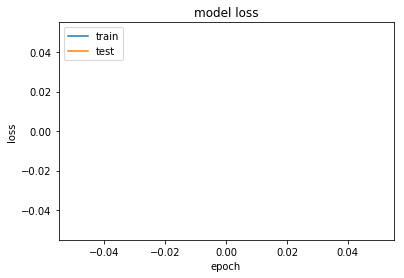

dict_keys(['loss', 'val_loss'])


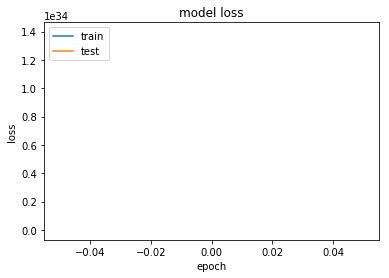

dict_keys(['loss', 'val_loss'])


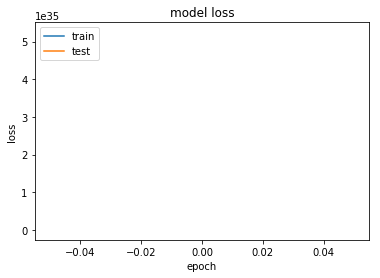

dict_keys(['loss', 'val_loss'])


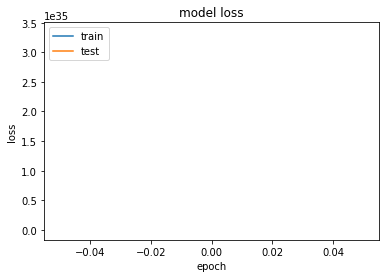

dict_keys(['loss', 'val_loss'])


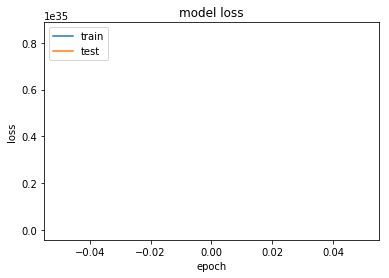

dict_keys(['loss', 'val_loss'])


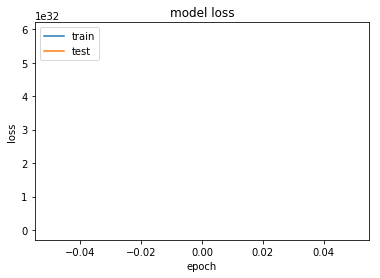

dict_keys(['loss', 'val_loss'])


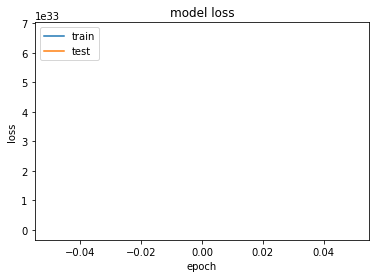

dict_keys(['loss', 'val_loss'])


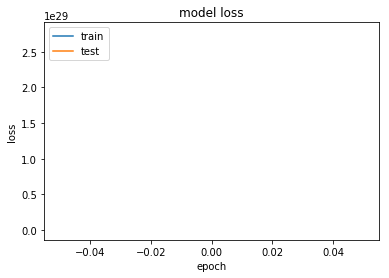

dict_keys(['loss', 'val_loss'])


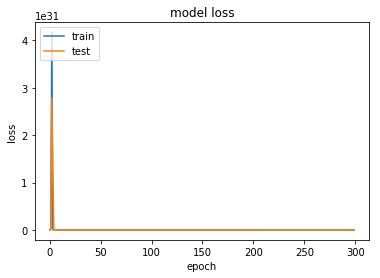

dict_keys(['loss', 'val_loss'])


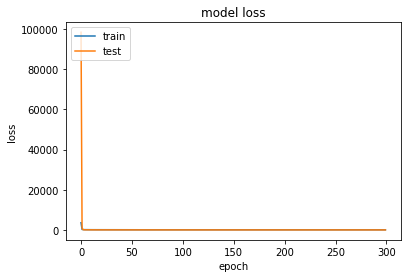

In [10]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
for i in lear_decay:

    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2, decay=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


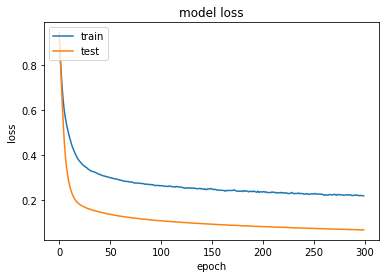

dict_keys(['loss', 'val_loss'])


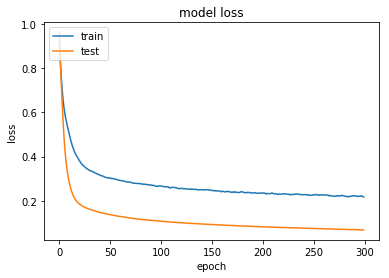

dict_keys(['loss', 'val_loss'])


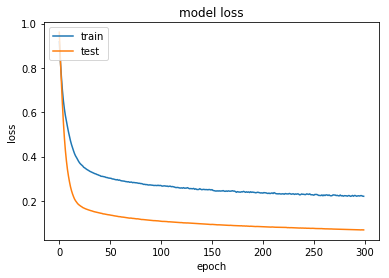

dict_keys(['loss', 'val_loss'])


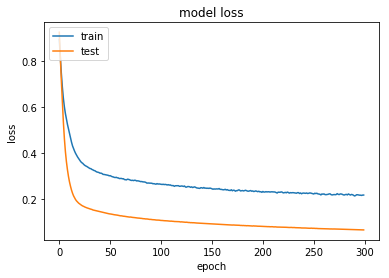

dict_keys(['loss', 'val_loss'])


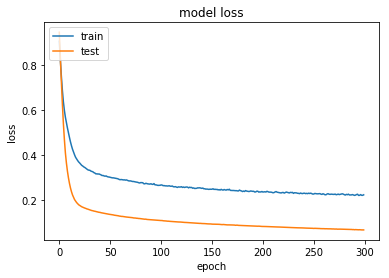

dict_keys(['loss', 'val_loss'])


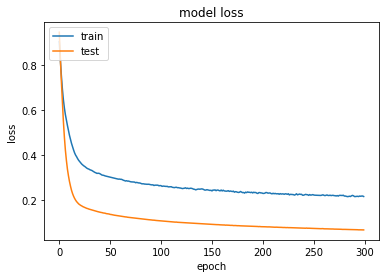

dict_keys(['loss', 'val_loss'])


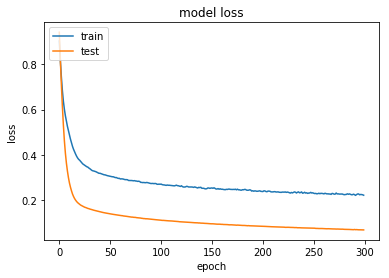

dict_keys(['loss', 'val_loss'])


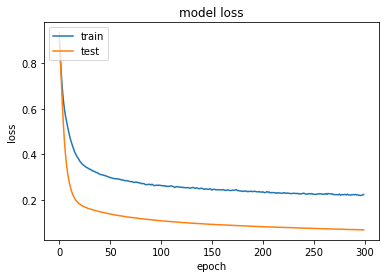

dict_keys(['loss', 'val_loss'])


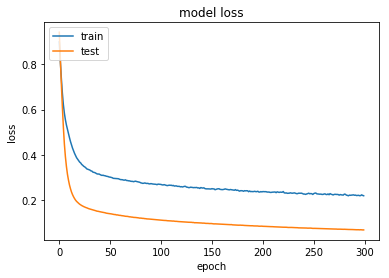

dict_keys(['loss', 'val_loss'])


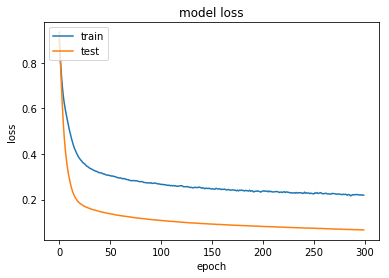

In [11]:
for i in lear_decay:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<h4>Pregunta H</h4>
<p>Entrene los modelos considerados en c) y d) usando momentum. Experimente usando momentum
cl´asico y momentum de Nesterov. ¿Observa un mejor resultado final? ¿Observa una mayor velocidad
de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de pruebas?</p>

<h6>Para sigmoidal</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


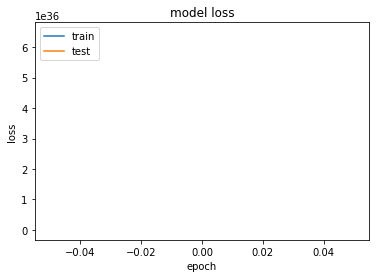

dict_keys(['loss', 'val_loss'])


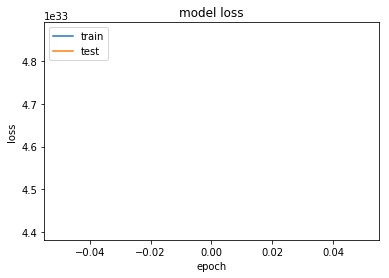

dict_keys(['loss', 'val_loss'])


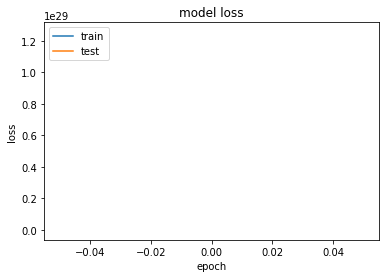

dict_keys(['loss', 'val_loss'])


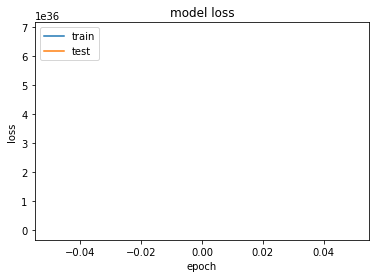

dict_keys(['loss', 'val_loss'])


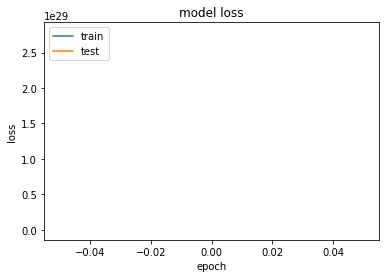

dict_keys(['loss', 'val_loss'])


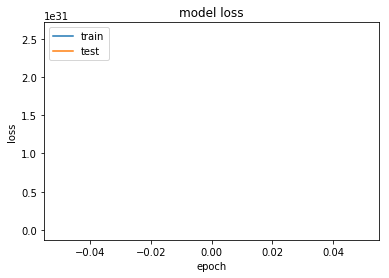

dict_keys(['loss', 'val_loss'])


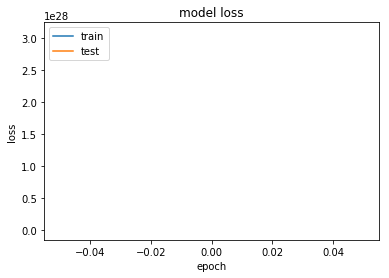

dict_keys(['loss', 'val_loss'])


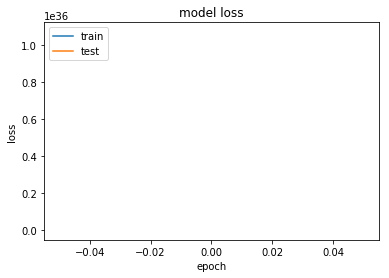

dict_keys(['loss', 'val_loss'])


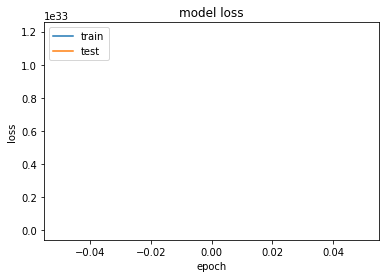

dict_keys(['loss', 'val_loss'])


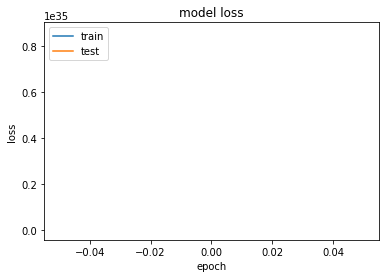

dict_keys(['loss', 'val_loss'])


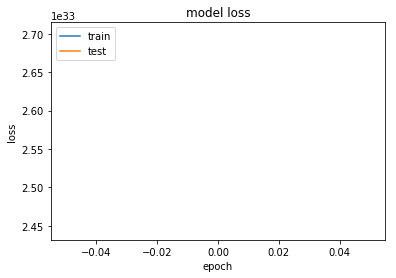

dict_keys(['loss', 'val_loss'])


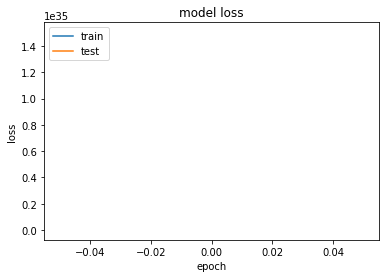

dict_keys(['loss', 'val_loss'])


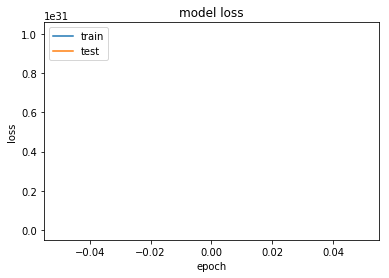

dict_keys(['loss', 'val_loss'])


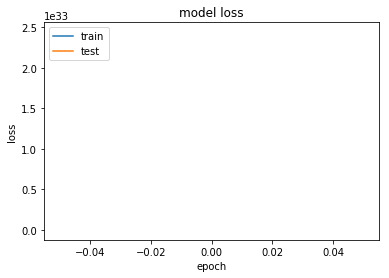

dict_keys(['loss', 'val_loss'])


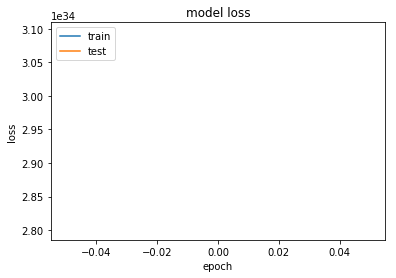

dict_keys(['loss', 'val_loss'])


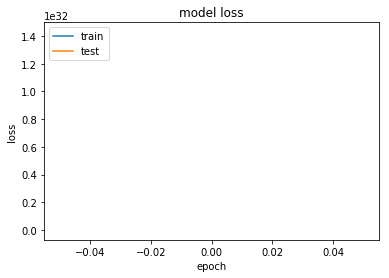

dict_keys(['loss', 'val_loss'])


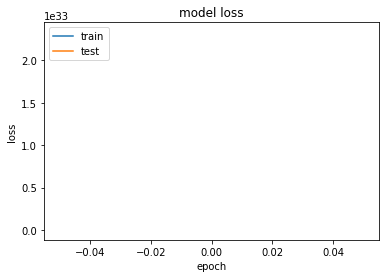

dict_keys(['loss', 'val_loss'])


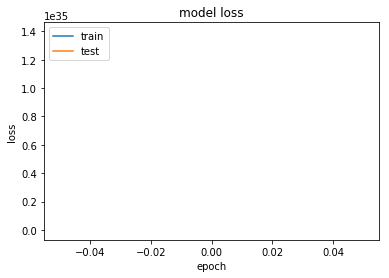

dict_keys(['loss', 'val_loss'])


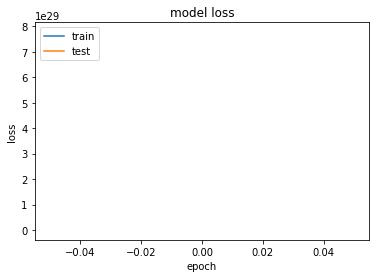

dict_keys(['loss', 'val_loss'])


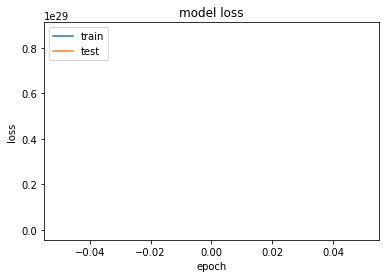

dict_keys(['loss', 'val_loss'])


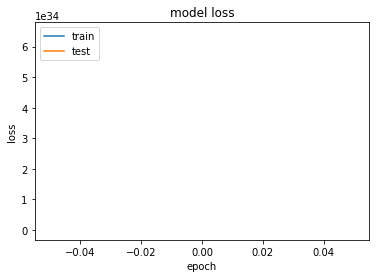

In [12]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)

for x in momentum:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2,momentum=x)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<h6>Para relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


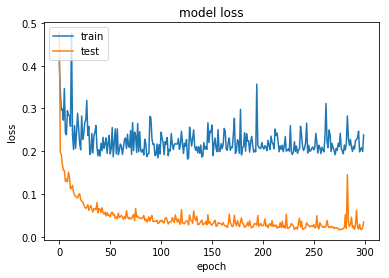

dict_keys(['loss', 'val_loss'])


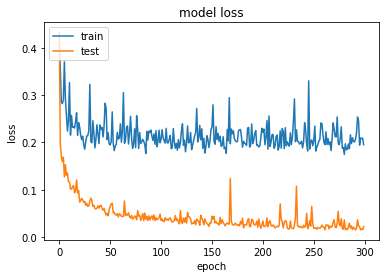

dict_keys(['loss', 'val_loss'])


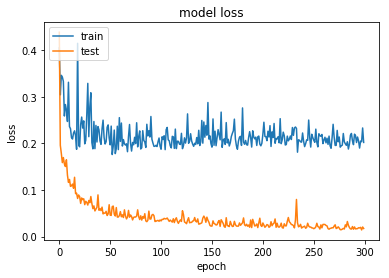

dict_keys(['loss', 'val_loss'])


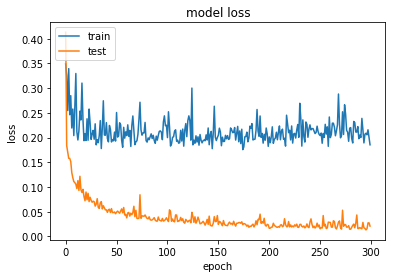

dict_keys(['loss', 'val_loss'])


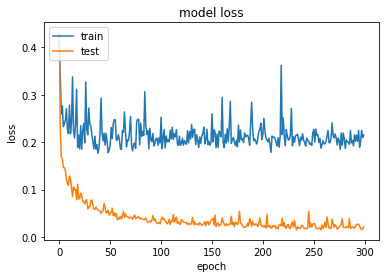

dict_keys(['loss', 'val_loss'])


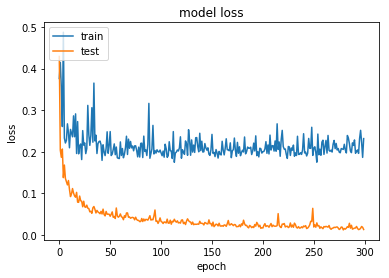

dict_keys(['loss', 'val_loss'])


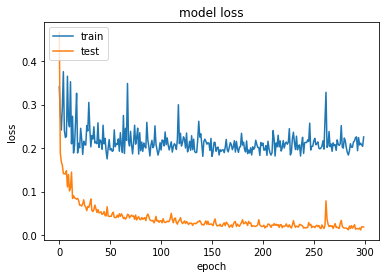

dict_keys(['loss', 'val_loss'])


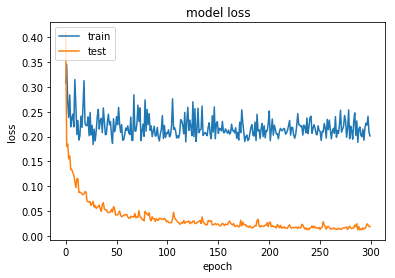

dict_keys(['loss', 'val_loss'])


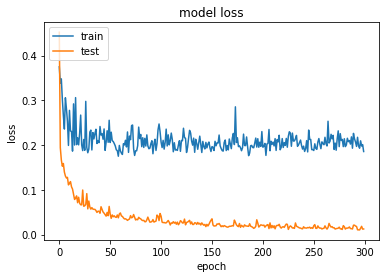

dict_keys(['loss', 'val_loss'])


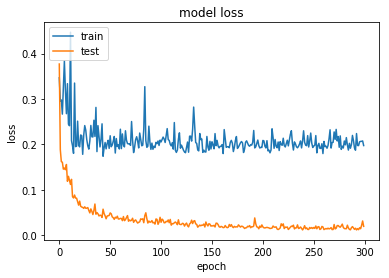

dict_keys(['loss', 'val_loss'])


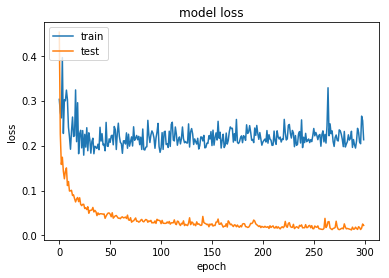

dict_keys(['loss', 'val_loss'])


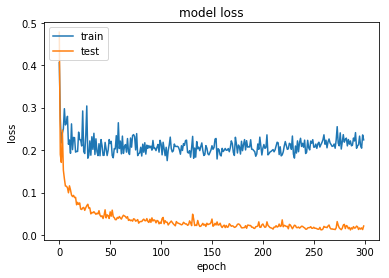

dict_keys(['loss', 'val_loss'])


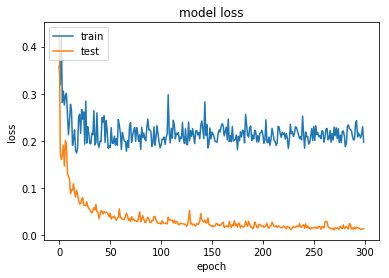

dict_keys(['loss', 'val_loss'])


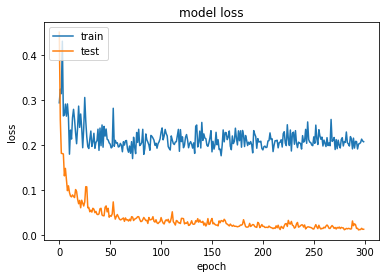

dict_keys(['loss', 'val_loss'])


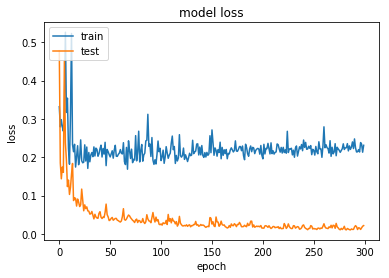

dict_keys(['loss', 'val_loss'])


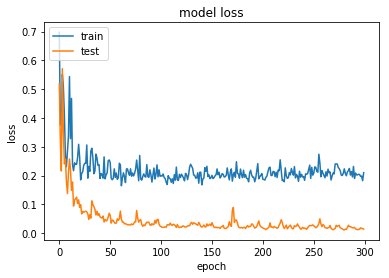

dict_keys(['loss', 'val_loss'])


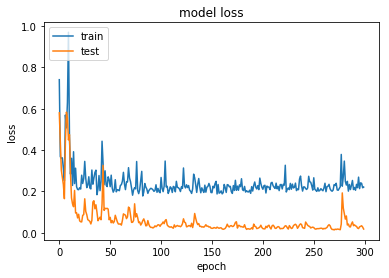

dict_keys(['loss', 'val_loss'])


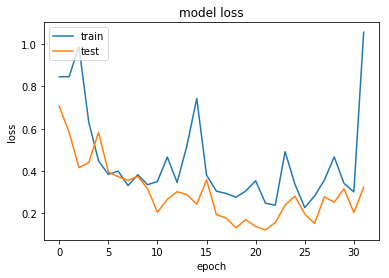

dict_keys(['loss', 'val_loss'])


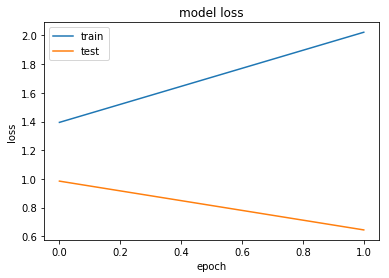

dict_keys(['loss', 'val_loss'])


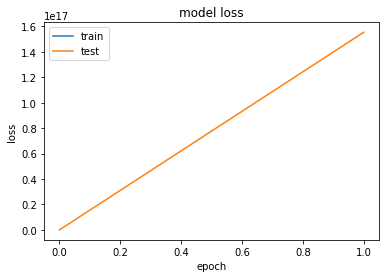

dict_keys(['loss', 'val_loss'])


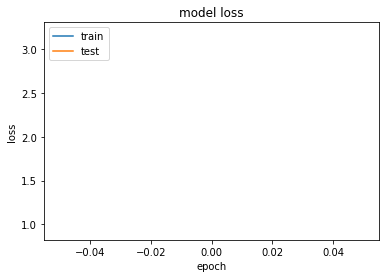

In [13]:
for x in momentum:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.2,momentum=x)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<h4>Pregunta I</h4>
<p>Entrene los modelos considerados en c) y d) utilizando SGD en mini-batches. Experimente con diferentes
tamaños del batch. Comente.</p>

<h6>Para sigmoidal</h6>

[   1.   20.   39.   58.   77.   96.  114.  133.  152.  171.  190.  209.
  228.  247.  266.  284.  303.  322.  341.  360.  379.]
1.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


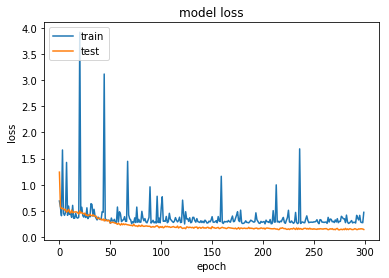

20.0
dict_keys(['loss', 'val_loss'])


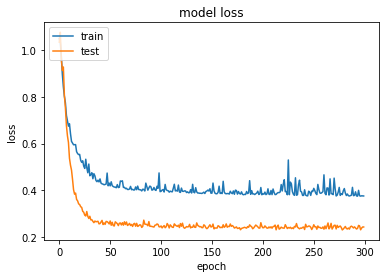

39.0
dict_keys(['loss', 'val_loss'])


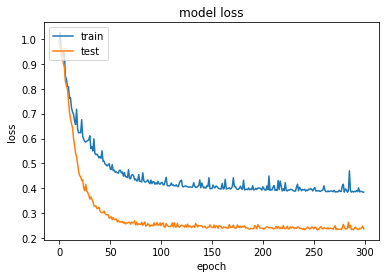

58.0
dict_keys(['loss', 'val_loss'])


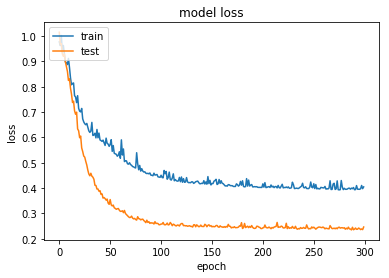

77.0
dict_keys(['loss', 'val_loss'])


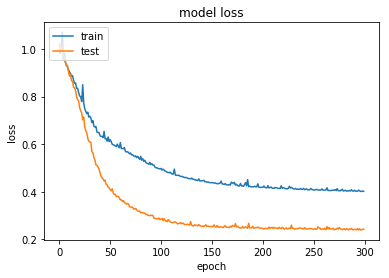

96.0
dict_keys(['loss', 'val_loss'])


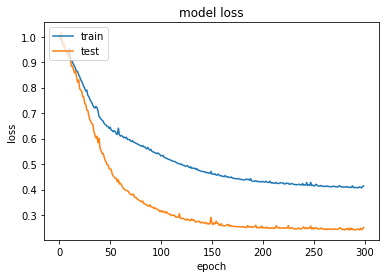

114.0
dict_keys(['loss', 'val_loss'])


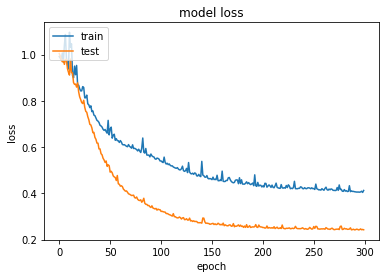

133.0
dict_keys(['loss', 'val_loss'])


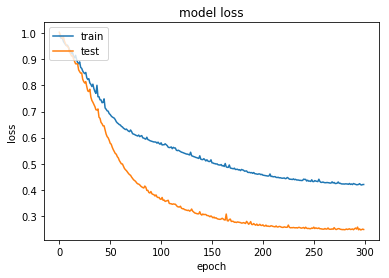

152.0
dict_keys(['loss', 'val_loss'])


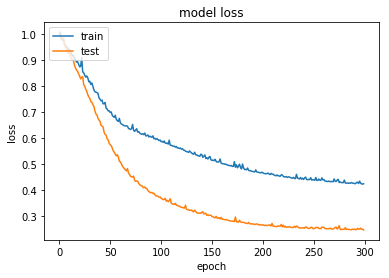

171.0
dict_keys(['loss', 'val_loss'])


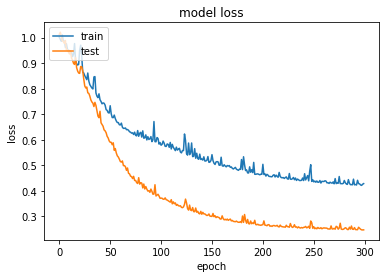

190.0
dict_keys(['loss', 'val_loss'])


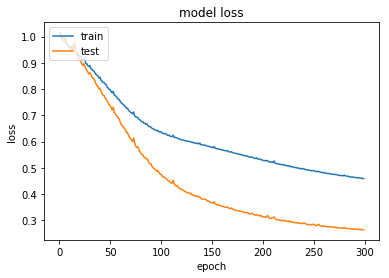

209.0
dict_keys(['loss', 'val_loss'])


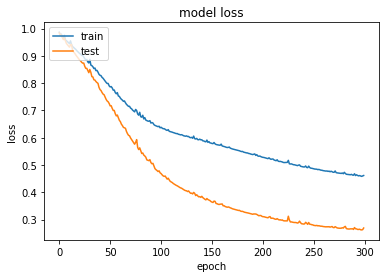

228.0
dict_keys(['loss', 'val_loss'])


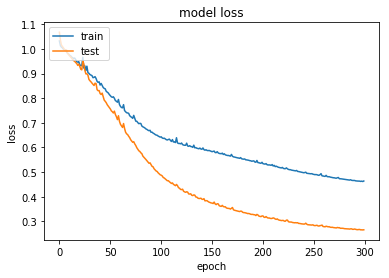

247.0
dict_keys(['loss', 'val_loss'])


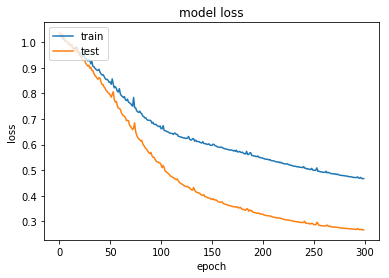

266.0
dict_keys(['loss', 'val_loss'])


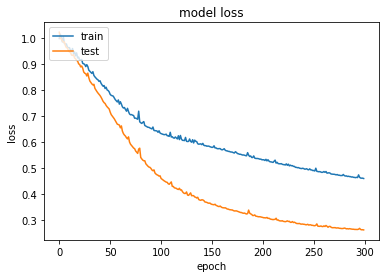

284.0
dict_keys(['loss', 'val_loss'])


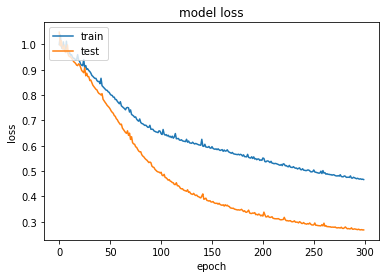

303.0
dict_keys(['loss', 'val_loss'])


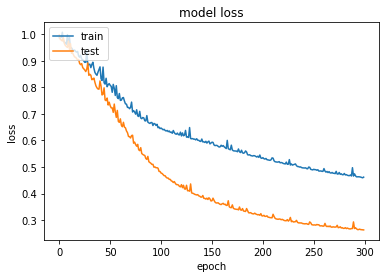

322.0
dict_keys(['loss', 'val_loss'])


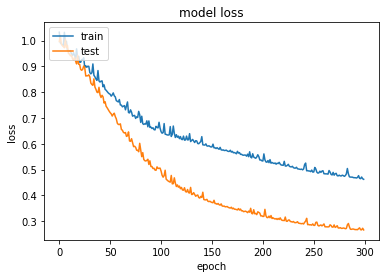

341.0
dict_keys(['loss', 'val_loss'])


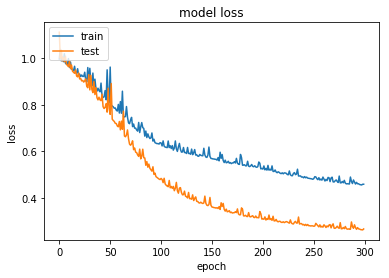

360.0
dict_keys(['loss', 'val_loss'])


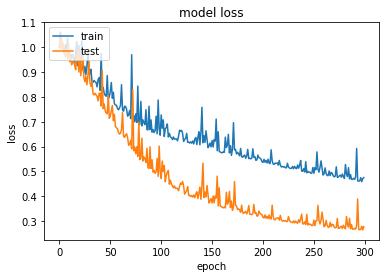

379.0
dict_keys(['loss', 'val_loss'])


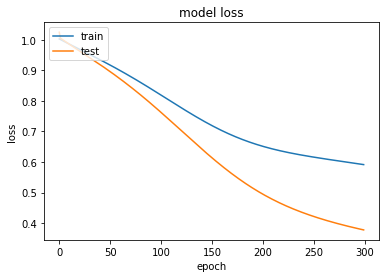

In [14]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
print(batch_sizes)
for z in batch_sizes:
    print(z)
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    hist = model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix(),batch_size=int(z),nb_epoch=300, verbose=0,validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   



<h6>Para función Relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


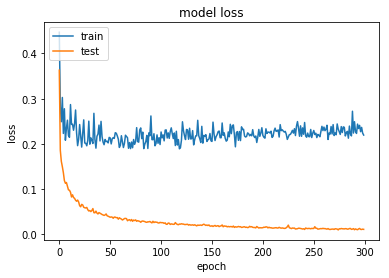

dict_keys(['loss', 'val_loss'])


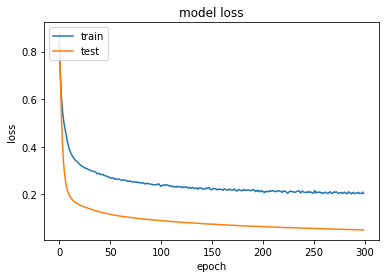

dict_keys(['loss', 'val_loss'])


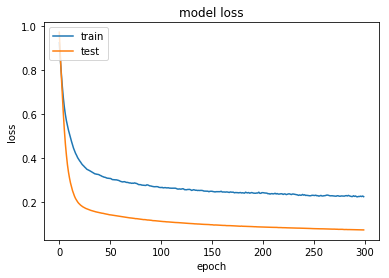

dict_keys(['loss', 'val_loss'])


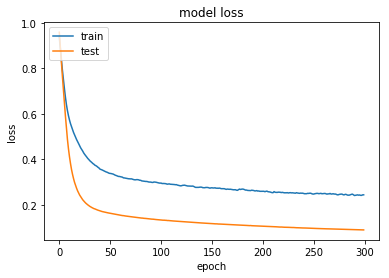

dict_keys(['loss', 'val_loss'])


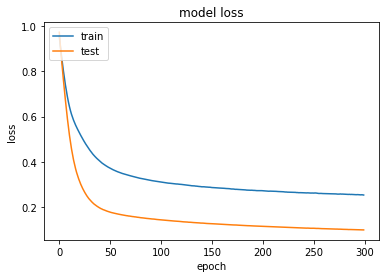

dict_keys(['loss', 'val_loss'])


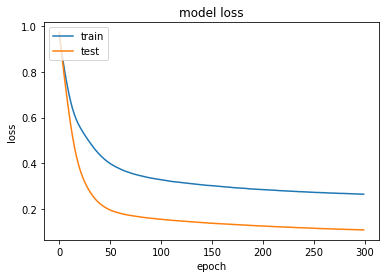

dict_keys(['loss', 'val_loss'])


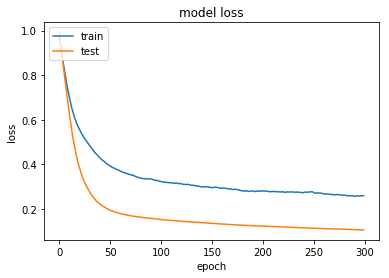

dict_keys(['loss', 'val_loss'])


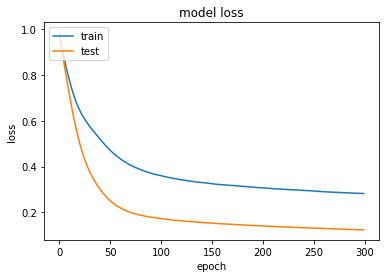

dict_keys(['loss', 'val_loss'])


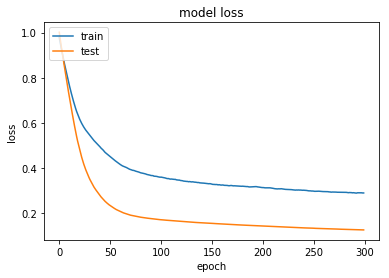

dict_keys(['loss', 'val_loss'])


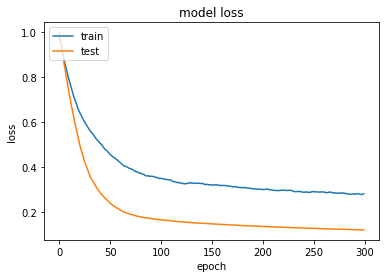

dict_keys(['loss', 'val_loss'])


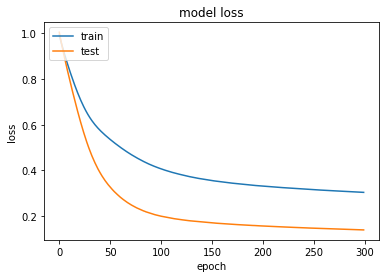

dict_keys(['loss', 'val_loss'])


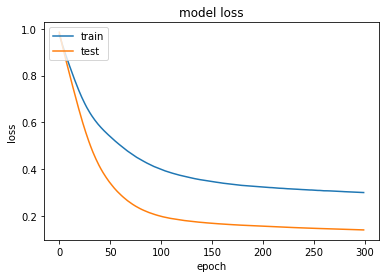

dict_keys(['loss', 'val_loss'])


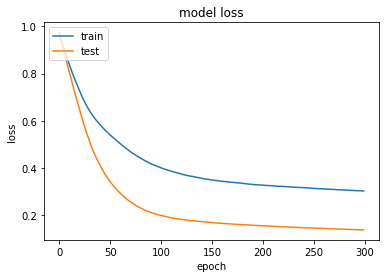

dict_keys(['loss', 'val_loss'])


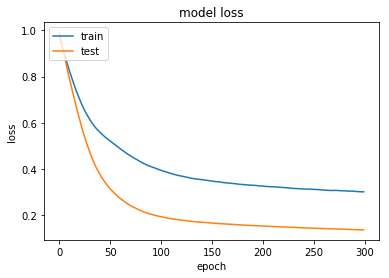

dict_keys(['loss', 'val_loss'])


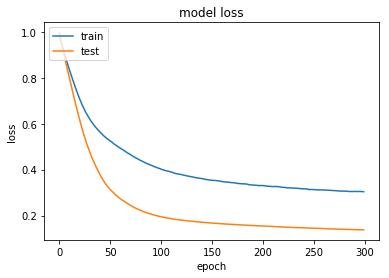

dict_keys(['loss', 'val_loss'])


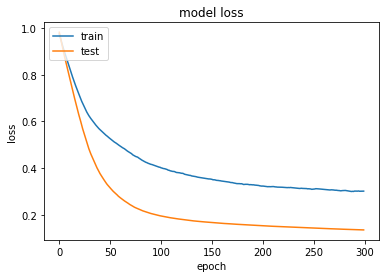

dict_keys(['loss', 'val_loss'])


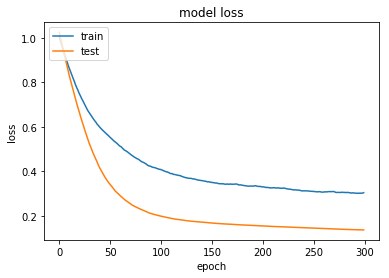

dict_keys(['loss', 'val_loss'])


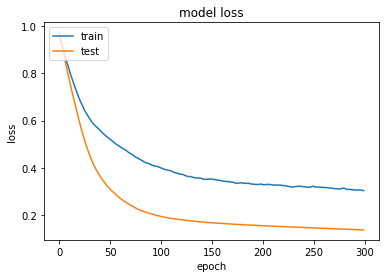

dict_keys(['loss', 'val_loss'])


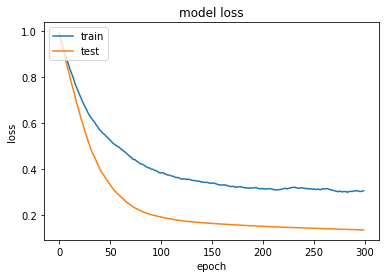

dict_keys(['loss', 'val_loss'])


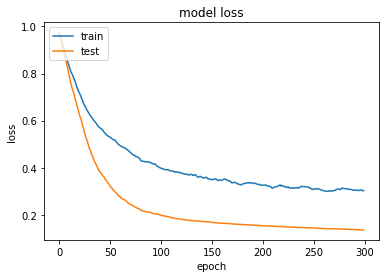

dict_keys(['loss', 'val_loss'])


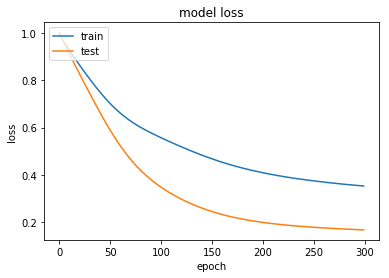

In [15]:
for z in batch_sizes:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix(),batch_size=int(z),nb_epoch=300, verbose=0,validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

<h4> Pregunta J <h4/>
<p>Entrene los modelos obtenidos en c) y d) utilizando estrategias modernas para adaptar la tasa de
aprendizaje. Compare los desempe˜nos de adagrad, adadelta, RMS prop y adam. ¿Se observa en alg´un
caso un mejor resultado final? ¿Se observa en alg´un caso una mayor velocidad de convergencia sobre
el dataset de entrenamiento? ¿Sobre el dataset de pruebas?</p>
<h5> Utilizando Adagrad como optimizador </h5>

Epoch 1/10
379/379 [==============================] - 0s - loss: 0.1676     
Epoch 2/10
379/379 [==============================] - 0s - loss: 0.1661     
Epoch 3/10
379/379 [==============================] - 0s - loss: 0.1642     
Epoch 4/10
379/379 [==============================] - 0s - loss: 0.1620     
Epoch 5/10
379/379 [==============================] - 0s - loss: 0.1608     
Epoch 6/10
379/379 [==============================] - 0s - loss: 0.1592     
Epoch 7/10
379/379 [==============================] - 0s - loss: 0.1578     
Epoch 8/10
379/379 [==============================] - 0s - loss: 0.1562     
Epoch 9/10
379/379 [==============================] - 0s - loss: 0.1547     
Epoch 10/10
379/379 [==============================] - 0s - loss: 0.1531     


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


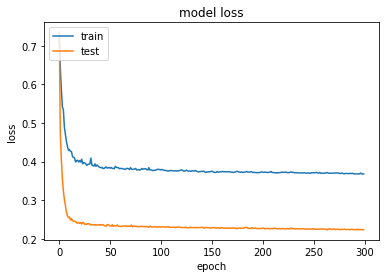

In [16]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

model.fit(X_train_scaled.as_matrix(),y_train_scaled.as_matrix())


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6> Utilizando Adadelta </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


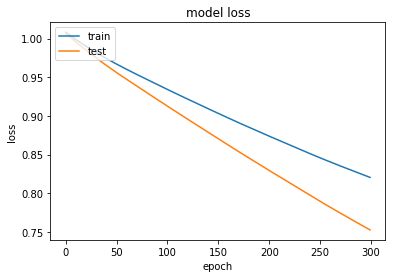

In [17]:



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Usando RMSprop</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


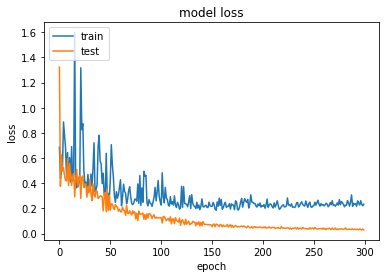

In [18]:



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Usando Adam</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


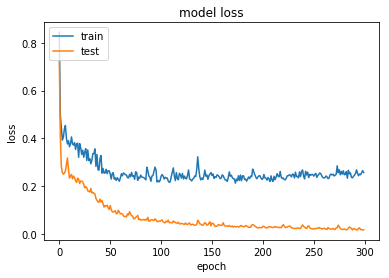

In [19]:


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Al comparar todos en un mismo gráfico</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:73: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


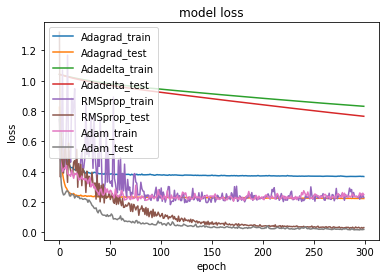

In [20]:


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adagrad_train', 'Adagrad_test', 'Adadelta_train', 'Adadelta_test', 'RMSprop_train', 'RMSprop_test', 'Adam_train', 'Adam_test'], loc='upper left')



plt.show()

<h6>Gráficos para función relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


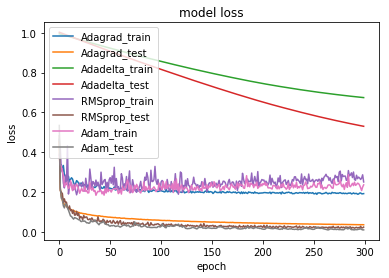

In [21]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')






model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adagrad_train', 'Adagrad_test', 'Adadelta_train', 'Adadelta_test', 'RMSprop_train', 'RMSprop_test', 'Adam_train', 'Adam_test'], loc='upper left')



plt.show()

<h4>Pregunta K</h4>
<p>Entrene los modelos obtenidos en c) y d) utilizando regularizadores `1 y `2 (weight decay). Compare
los desempe˜nos de prueba obtenidos antes y despu´es de regularizar. Experimente con distintos
valores del par´ametro de regularizaci´on y comente. Luego, agregue una capa al modelo y aumente
significativamente el n´umero de neuronas escondidas en cada capa. Eval´ue nuevamente el efecto de los
regularizadores.</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['loss', 'val_loss'])


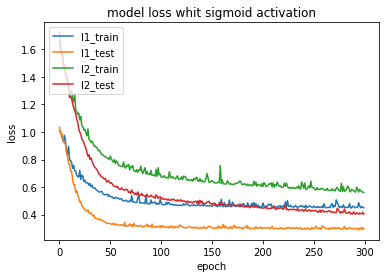

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:60: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


dict_keys(['loss', 'val_loss'])


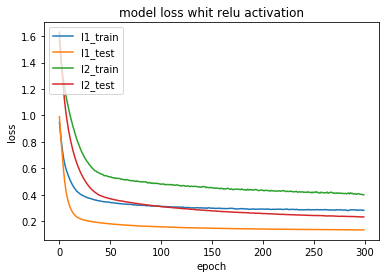

In [22]:
from keras import regularizers


model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss whit sigmoid activation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['l1_train', 'l1_test', 'l2_train', 'l2_test'], loc='upper left')
plt.show()






model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



plt.title('model loss whit relu activation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['l1_train', 'l1_test', 'l2_train', 'l2_test'], loc='upper left')
plt.show()

<h4>Pregunta L</h4>
<p>Entrene los modelos obtenidos en c) y d) utilizando Dropout. Compare los desempe˜nos de prueba
obtenidos antes y despu´es de regularizar. Experimente con distintos valores del par´ametro de regularizaci´on
y comente. Luego, agregue una capa al modelo y aumente significativamente el n´umero de
neuronas escondidas en cada capa. Eval´ue nuevamente el efecto de la regularizaci´on, evaluando tambi´en
el efecto de regularizar s´olo la capa inicial versus la alternativa de regularizar todas las capas.</p>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


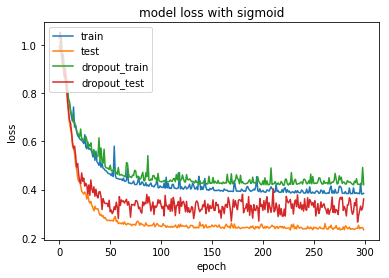

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


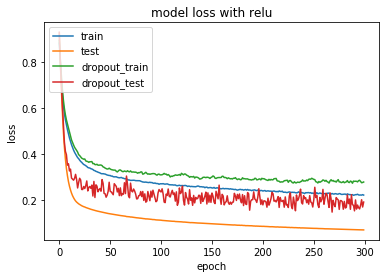

In [23]:
from keras.layers import Dropout



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with sigmoid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'dropout_train', 'dropout_test'], loc='upper left')
plt.show()



model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'dropout_train', 'dropout_test'], loc='upper left')
plt.show()

<h4>Comparación usando distinto valores para el Dropout con la función sigmoidal</h4>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])
0.001


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


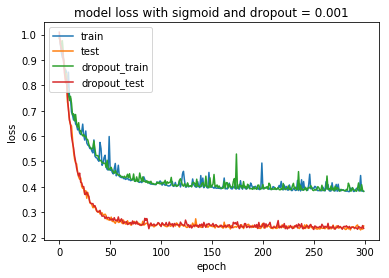

dict_keys(['loss', 'val_loss'])
0.0535789473684
dict_keys(['loss', 'val_loss'])


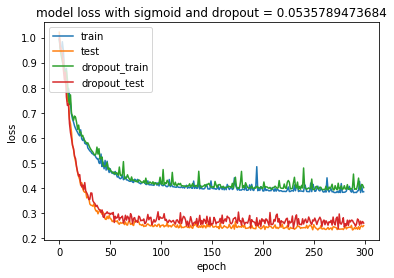

dict_keys(['loss', 'val_loss'])
0.106157894737
dict_keys(['loss', 'val_loss'])


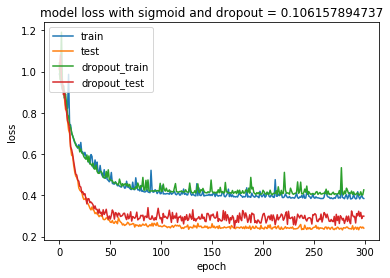

dict_keys(['loss', 'val_loss'])
0.158736842105
dict_keys(['loss', 'val_loss'])


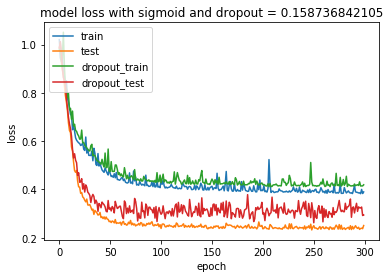

dict_keys(['loss', 'val_loss'])
0.211315789474
dict_keys(['loss', 'val_loss'])


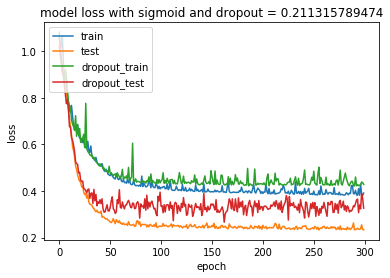

dict_keys(['loss', 'val_loss'])
0.263894736842
dict_keys(['loss', 'val_loss'])


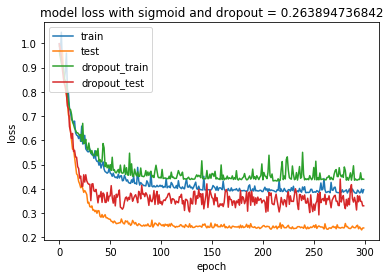

dict_keys(['loss', 'val_loss'])
0.316473684211
dict_keys(['loss', 'val_loss'])


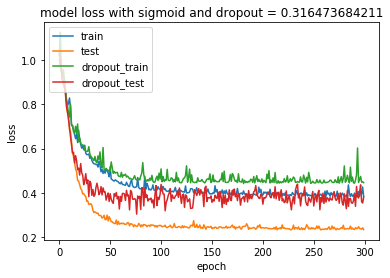

dict_keys(['loss', 'val_loss'])
0.369052631579
dict_keys(['loss', 'val_loss'])


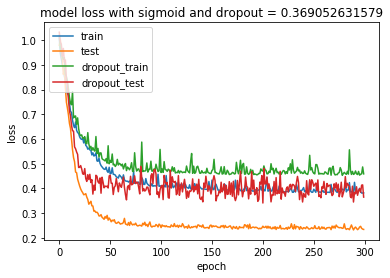

dict_keys(['loss', 'val_loss'])
0.421631578947
dict_keys(['loss', 'val_loss'])


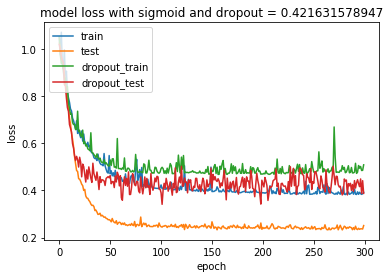

dict_keys(['loss', 'val_loss'])
0.474210526316
dict_keys(['loss', 'val_loss'])


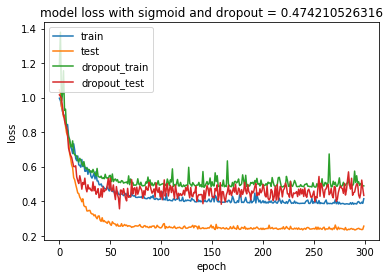

dict_keys(['loss', 'val_loss'])
0.526789473684
dict_keys(['loss', 'val_loss'])


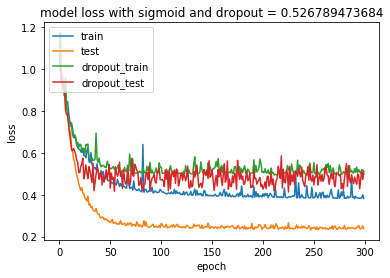

dict_keys(['loss', 'val_loss'])
0.579368421053
dict_keys(['loss', 'val_loss'])


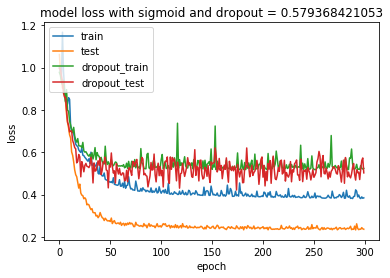

dict_keys(['loss', 'val_loss'])
0.631947368421
dict_keys(['loss', 'val_loss'])


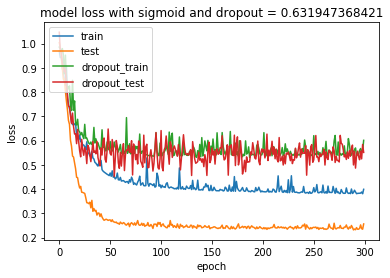

dict_keys(['loss', 'val_loss'])
0.684526315789
dict_keys(['loss', 'val_loss'])


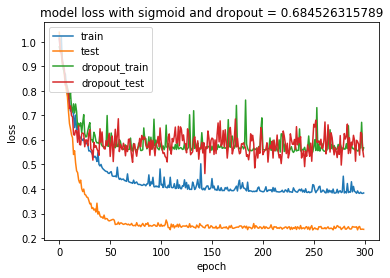

dict_keys(['loss', 'val_loss'])
0.737105263158
dict_keys(['loss', 'val_loss'])


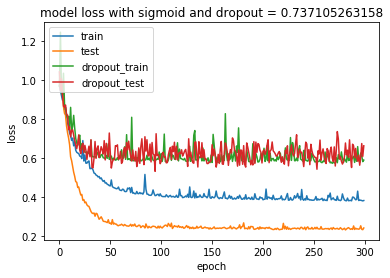

dict_keys(['loss', 'val_loss'])
0.789684210526
dict_keys(['loss', 'val_loss'])


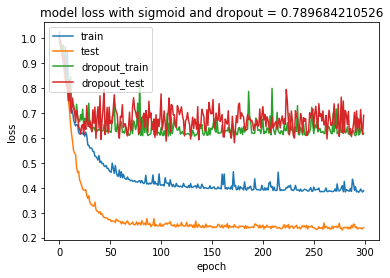

dict_keys(['loss', 'val_loss'])
0.842263157895
dict_keys(['loss', 'val_loss'])


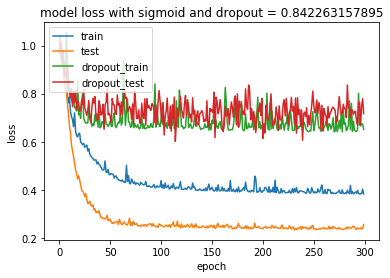

dict_keys(['loss', 'val_loss'])
0.894842105263
dict_keys(['loss', 'val_loss'])


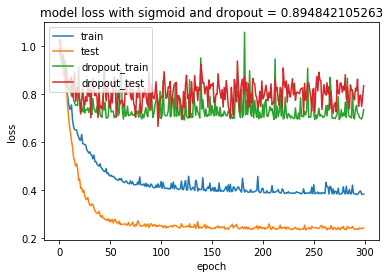

dict_keys(['loss', 'val_loss'])
0.947421052632
dict_keys(['loss', 'val_loss'])


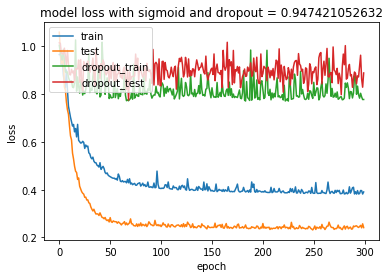

dict_keys(['loss', 'val_loss'])
1.0


/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py:1519: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_223_model" was not an Input tensor, it was generated by layer dropout_22.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: dropout_22_input:0
  str(x.name))


AttributeError: 'Dropout' object has no attribute 'is_placeholder'

In [24]:
lear_rate = np.linspace(0.001,1,n_lr)
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    model = Sequential()

    idim=X_train_scaled.shape[1]
    print(i)
    model.add(Dropout(i, input_shape=(idim,)))
    model.add(Dense(200,input_dim=idim,init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    plt.title('model loss with sigmoid and dropout = '+ str(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test', 'dropout_train' , 'dropout_test'], loc='upper left')
    plt.show()

<h4>Comparación usando distinto valores para el Dropout con la función relu</h4>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])
0.001


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


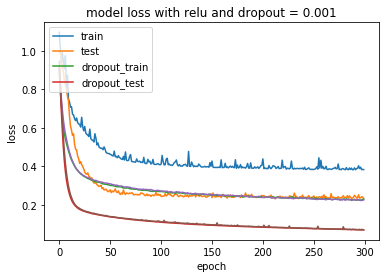

dict_keys(['loss', 'val_loss'])
0.409142857143
dict_keys(['loss', 'val_loss'])


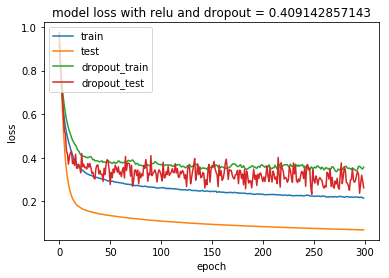

dict_keys(['loss', 'val_loss'])
0.817285714286
dict_keys(['loss', 'val_loss'])


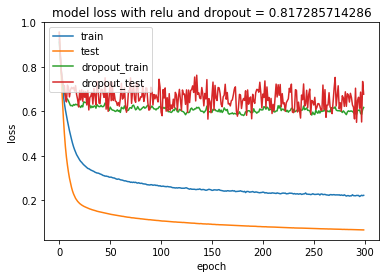

dict_keys(['loss', 'val_loss'])
1.22542857143


/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py:1519: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "sequential_231_model" was not an Input tensor, it was generated by layer dropout_26.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: dropout_26_input:0
  str(x.name))


AttributeError: 'Dropout' object has no attribute 'is_placeholder'

In [25]:
lear_rate = np.linspace(0.001, n_lr)
for i in lear_rate:
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    model = Sequential()

    idim=X_train_scaled.shape[1]
    print(i)
    model.add(Dropout(i, input_shape=(idim,)))
    model.add(Dense(200,input_dim=idim,init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    print(hist.history.keys())
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['loss'])




    plt.title('model loss with relu and dropout = '+ str(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test', 'dropout_train' , 'dropout_test'], loc='upper left')
    plt.show()

<h6>Agregando una capa y utilizando 400 neuronas con la función sigmoidal</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


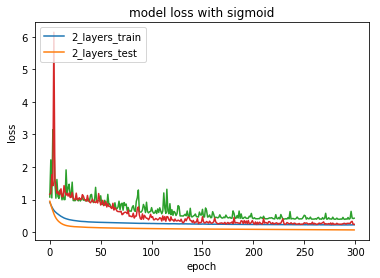

In [26]:



model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with sigmoid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['2_layers_train', '2_layers_test'], loc='upper left')
plt.show()


<h6>Agregando una capa y usando 400 neuronas con la función relu</h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


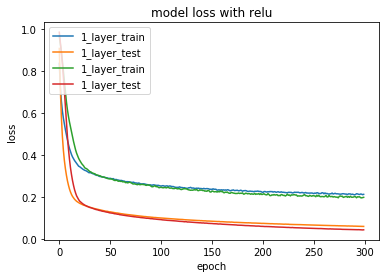

In [27]:

model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))


model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




plt.title('model loss with relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1_layer_train', '1_layer_test', '1_layer_train', '1_layer_test'], loc='upper left')
plt.show()


<h6>Comparación en la función sigmoidal sin regularizar, regularizando 1 capa, y regularizando ambas capas escondidas </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


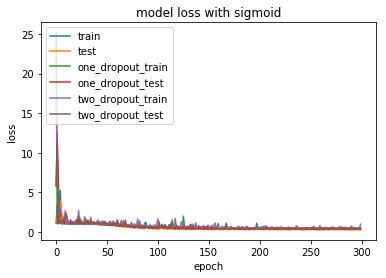

In [28]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400, init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


plt.title('model loss with sigmoid')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'one_dropout_train', 'one_dropout_test', 'two_dropout_train', 'two_dropout_test'], loc='upper left')
plt.show()


<h6>Comparación en la función relu sin regularizar, regularizando 1 capa, y regularizando ambas capas escondidas </h6>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, input_dim=13, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, kernel_initializer="uniform")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


dict_keys(['loss', 'val_loss'])


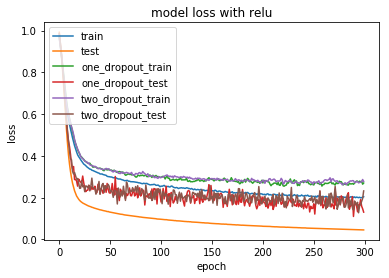

In [29]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])




model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])



model = Sequential()

idim=X_train_scaled.shape[1]
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2, input_shape=(idim,)))
model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
print(hist.history.keys())
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])


plt.title('model loss with relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'one_dropout_train', 'one_dropout_test', 'two_dropout_train', 'two_dropout_test'], loc='upper left')
plt.show()


<h4>Pregunta M</h4>
<p>Fijando todos los demás hiper-parámetros del modelo definido en c) y d), utilice validación cruzada
para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje,
número de neuronas, parámetro de regularización, etc).</p>

<h6>Validando para obtener la cantidad de neuronas de la capa escondida en relu</h6>

In [30]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
models = []
for i, (train, val) in enumerate(kfold):
    print(i)
    # create model
    model = Sequential()
    model.add(Dense(int(1000 / (i + 1)), input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model

    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    models.append([models, 1000/ (i + 1),scores])
print(cvscores)
print(models)

0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


32/38 [========================>.....] - ETA: 0s1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s2


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(333, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s3


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(250, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s4


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s5


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(166, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s6


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(142, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s7


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(125, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s8


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(111, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s9


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/37 [========================>.....] - ETA: 0s[nan, nan, nan, nan, nan, nan, 0.24303773202394185, nan, nan, 0.056755276849946461]
[[[...], 1000.0, nan], [[...], 500.0, nan], [[...], 333.3333333333333, nan], [[...], 250.0, nan], [[...], 200.0, nan], [[...], 166.66666666666666, nan], [[...], 142.85714285714286, 0.24303773202394185], [[...], 125.0, nan], [[...], 111.11111111111111, nan], [[...], 100.0, 0.056755276849946461]]


<h6>Validando para obtener la cantidad de neuronas de la capa escondida en sigmoidal</h6>


In [31]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
models = []
for i, (train, val) in enumerate(kfold):
    print(i)
    # create model
    model = Sequential()
    model.add(Dense(int(1000 / (i + 1)), input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
    # evaluate the model

    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
    models.append([models, 1000/ (i + 1),scores])
print(cvscores)
print(models)

0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


32/38 [========================>.....] - ETA: 0s1


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s2


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(333, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s3


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(250, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s4


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s5


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(166, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s6


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(142, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s7


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(125, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s8


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(111, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/38 [========================>.....] - ETA: 0s9


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=13, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


32/37 [========================>.....] - ETA: 0s[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[[[...], 1000.0, nan], [[...], 500.0, nan], [[...], 333.3333333333333, nan], [[...], 250.0, nan], [[...], 200.0, nan], [[...], 166.66666666666666, nan], [[...], 142.85714285714286, nan], [[...], 125.0, nan], [[...], 111.11111111111111, nan], [[...], 100.0, nan]]
